# **Diabetes Risk Prediction**

## I. Introduction

---


Author : Ayudha Amari Hirtranusi  
Dataset : [CDC Diabetes Health Indicators](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators)  
Hugging Face : [Link](https://huggingface.co/spaces/amariayudha/Diabetes_Prediction)

---
  
Objective :  This project aims to develop a predictive model for diabetes risk assessment using the CDC Diabetes Health Indicators dataset. This project will analyze various health factors & lifestyle and their relationship to diabetes, create a machine learning model that can accurately predict an individual's likelihood of having or developing diabetes, and provide insights that could be valuable for early intervention and public health strategies. This project aims to build a **classification model** to predict diabetes by evaluating `KNN`, `SVM`, `Logistic Regression`, `Decision Tree`, `Random Forest`, and `XGBoost`. Model performance will be primarily assessed using `Recall` to measure effectiveness in **identifying diabetes cases** to **minimize the false negative**, which is the condition where a person is predicted as non-diabetic but actually has diabetes. This way, we can prevent someone from getting diabetes to provide appropriate treatment. Therefore, our primary goal is to develop a machine learning model that can predict an individual’s risk of developing diabetes with 80% recall within six months, enabling better early intervention strategies.

## Problem Identification
In this project, we will define the problem statement and its goals using the SMART framework, then we will analyze it further by breaking down the problem into questions.

**Topic** : Diabetes Risk Prediction


### Background
Diabetes is a growing public health issue, affecting millions of people worldwide. **Early detection and effective intervention are critical** to managing this condition and reducing associated health risks. The CDC provides a dataset that includes health indicators such as BMI, blood pressure, age, physical activity, and other factors that could be linked to diabetes. By understanding these factors and creating predictive models, public health agencies and individuals can take proactive steps toward better management and prevention of diabetes. **As a data scientist from hospital "XYZ"**, you are tasked to develop a machine learning model that can predict an individual’s risk of developing diabetes based on survey information from the Behavioral Risk Factor Surveillance System (BRFSS). 


**Problem statement**  
"The prevalence of diabetes has significantly increased, creating a public health burden. The goal is to develop a machine learning model that can predict an individual’s risk of developing diabetes with 80% recall within six months, enabling better early intervention strategies."

### Breaking Down The Problem
Main problem: Predicting the likelihood of diabetes and identifying key health and lifestyle factors that contribute to diabetes risk.

- Health Indicators:

1. Which age group has the highest prevalence of diabetes?
2. Which education level is most associated with diabetes cases?
3. Which lifestyle factor (e.g., smoking, physical inactivity) is most common among those with diabetes?
4. Which health condition (e.g., high blood pressure, high cholesterol) is most frequently reported among diabetic individuals?
5. Which demographic group (income) has the highest proportion of diabetes cases?
6. How does BMI correlate with the likelihood of diabetes?
7. What is the relationship between mental health (days of poor mental health) and diabetes risk?

- Model Development:

1. Which machine learning algorithm performs best for predicting diabetes risk?
2. How can feature selection be optimized to improve prediction recall?
3. What is the importance of data balancing techniques in improving model performance?

- Public Health Insights:

1. What are the most common health profiles among high-risk individuals?
2. How can insights from this model be used to guide public health interventions?

### Dataset Description
The dataset used in this analysis is the **CDC Diabetes Health Indicators dataset**, obtained from the UC Irvine Machine Learning Repository. This dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 22 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy.


| Variable               | Type      | Description                                                                                                  |
|------------------------|-----------|--------------------------------------------------------------------------------------------------------------|
| ID                     | Integer   | Patient ID                                                                                                   |
| Diabetes_binary        | Binary    | 0 = no diabetes, 1 = prediabetes or diabetes                                                                 |
| HighBP                 | Binary    | 0 = no high BP, 1 = high BP                                                                                  |
| HighChol               | Binary    | 0 = no high cholesterol, 1 = high cholesterol                                                                |
| CholCheck              | Binary    | 0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years                                    |
| BMI                    | Integer   | Body Mass Index                                                                                              |
| Smoker                 | Binary    | Have you smoked at least 100 cigarettes in your entire life? (0 = no, 1 = yes)                               |
| Stroke                 | Binary    | (Ever told) you had a stroke (0 = no, 1 = yes)                                                               |
| HeartDiseaseorAttack   | Binary    | Coronary heart disease (CHD) or myocardial infarction (MI) (0 = no, 1 = yes)                                 |
| PhysActivity           | Binary    | Physical activity in past 30 days - not including job (0 = no, 1 = yes)                                      |
| Fruits                 | Binary    | Consume fruit 1 or more times per day (0 = no, 1 = yes)                                                      |
| Veggies                | Binary    | Consume vegetables 1 or more times per day (0 = no, 1 = yes)                                                 |
| HvyAlcoholConsump      | Binary    | Heavy drinkers (men > 14 drinks/week, women > 7 drinks/week) (0 = no, 1 = yes)                               |
| AnyHealthcare          | Binary    | Have any kind of health care coverage (0 = no, 1 = yes)                                                      |
| NoDocbcCost            | Binary    | Skipped doctor visit due to cost in the past 12 months (0 = no, 1 = yes)                                     |
| GenHlth                | Integer   | General health rating (1 = excellent, 5 = poor)                                                              |
| MentHlth               | Integer   | Days of poor mental health in past 30 days (scale: 1-30 days)                                                |
| PhysHlth               | Integer   | Days of poor physical health in past 30 days (scale: 1-30 days)                                              |
| DiffWalk               | Binary    | Difficulty walking or climbing stairs (0 = no, 1 = yes)                                                      |
| Sex                    | Binary    | Sex (0 = female, 1 = male)                                                                                   |
| Age                    | Integer   | Age category (1 = 18-24, 9 = 60-64, 13 = 80 or older)                                                        |
| Education              | Integer   | Education level (1 = Elementary, 6 = College graduate)                                                       |
| Income                 | Integer   | Income level (1 = less than $10,000, 8 = $75,000 or more)                                                    |





## II. Import Libraries


In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and model evaluation
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Saving Model
import pickle

# Libraries for statistics
import phik

# Data preprocessing
from sklearn.pipeline import Pipeline
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from sklearn.compose import ColumnTransformer

# Tabulate for pretty printing
from tabulate import tabulate

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## III. Data Preprocess


### III.I Data Loading

The dataset obtained from the UC Irvine Machine Learning Repository is loaded first using the following query :
```py
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
```

Next, we save the dataset that has been fetched and save it into csv files. Therefore, we don't need to download it everytime we run the notebook. This approach saves time and ensures consistency across multiple executions of our analysis. Now, lets load our dataframe from csv files and create a backup of our original dataframe.

In [2]:
# Load the data from the CSV file
df = pd.read_csv('cdc_diabetes_health_indicators.csv')

# Backup of original dataframe
df_ori = df

Now, we will try to display our first 10 rows and last 10 rows as follows.

In [3]:
# Display the first 10 rows
df.head(10)

,ID,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,0,1,1,1,40,1,0,0,0,0,...,0,5,18,15,1,0,9,4,3,0
1,1,0,0,0,25,1,0,0,1,0,...,1,3,0,0,0,0,7,6,1,0
2,2,1,1,1,28,0,0,0,0,1,...,1,5,30,30,1,0,9,4,8,0
3,3,1,0,1,27,0,0,0,1,1,...,0,2,0,0,0,0,11,3,6,0
4,4,1,1,1,24,0,0,0,1,1,...,0,2,3,0,0,0,11,5,4,0
5,5,1,1,1,25,1,0,0,1,1,...,0,2,0,2,0,1,10,6,8,0
6,6,1,0,1,30,1,0,0,0,0,...,0,3,0,14,0,0,9,6,7,0
7,7,1,1,1,25,1,0,0,1,0,...,0,3,0,0,1,0,11,4,4,0
8,8,1,1,1,30,1,0,1,0,1,...,0,5,30,30,1,0,9,5,1,1
9,9,0,0,1,24,0,0,0,0,0,...,0,2,0,0,0,1,8,4,3,0


In [4]:
# Display the last 10 rows
df.tail(10)

,ID,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
253670,253670,1,1,1,25,0,0,1,0,1,...,0,5,15,0,1,0,13,6,4,1
253671,253671,1,1,1,23,0,1,1,0,0,...,1,4,0,5,0,1,8,3,2,0
253672,253672,1,0,1,30,1,0,1,1,1,...,0,3,0,0,0,1,12,2,1,0
253673,253673,1,0,1,42,0,0,0,1,1,...,0,3,14,4,0,1,3,6,8,0
253674,253674,0,0,1,27,0,0,0,0,0,...,0,1,0,0,0,0,3,6,5,0
253675,253675,1,1,1,45,0,0,0,0,1,...,0,3,0,5,0,1,5,6,7,0
253676,253676,1,1,1,18,0,0,0,0,0,...,0,4,0,0,1,0,11,2,4,1
253677,253677,0,0,1,28,0,0,0,1,1,...,0,1,0,0,0,0,2,5,2,0
253678,253678,1,0,1,23,0,0,0,0,1,...,0,3,0,0,0,1,7,5,1,0
253679,253679,1,1,1,25,0,0,1,1,1,...,0,2,0,0,0,0,9,6,2,1


Next up, we will use the `info()` method to get a concise summary of the DataFrame, including the column names, non-null counts, and data types. This will help us understand the structure of our dataset and identify any potential issues like missing values or incorrect data types.

In [5]:
# Data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   ID                    253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

Based on the output above, we can see that the dataset contains **253,680 rows** with **no null values**. Also, there are some features who are treated as numerical but it should be a categorical as follows:

1. Categorical Features Encoded as Integers:

- HighBP (0 = no high BP, 1 = high BP)
- HighChol (0 = no high cholesterol, 1 = high cholesterol)
- CholCheck (0 = no cholesterol check, 1 = yes cholesterol check)
- Smoker (0 = no, 1 = yes)
- Stroke (0 = no, 1 = yes)
- HeartDiseaseorAttack (0 = no, 1 = yes)
- PhysActivity (0 = no, 1 = yes)
- Fruits (0 = no, 1 = yes)
- Veggies (0 = no, 1 = yes)
- HvyAlcoholConsump (0 = no, 1 = yes)
- AnyHealthcare (0 = no, 1 = yes)
- NoDocbcCost (0 = no, 1 = yes)
- DiffWalk (0 = no, 1 = yes)
- Sex (0 = female, 1 = male)
- Diabetes_binary (0 = no diabetes, 1 = prediabetes or diabetes)

Although these variables are stored as integers, they represent categorical binary choices and should ideally be treated as categorical features in any analysis or modeling.

2. Ordinal Categorical Features Encoded as Integers:

- GenHlth (Scale 1-5, 1 = excellent, 5 = poor)
- Age (13-level age category, 1 = 18-24, 13 = 80 or older)
- Education (Scale 1-6, 1 = elementary, 6 = college graduate)
- Income (Scale 1-8, 1 = less than $10,000, 8 = $75,000+)

These features are ordinal in nature, meaning they have a meaningful order or ranking but do not have continuous numeric properties. While they can remain as integers for some analyses (like decision trees), it's important to recognize their categorical nature when choosing the appropriate modeling techniques. Even tho `Age`, `Income` are numerical features in nature, but since the dataset source already group them (binning) into encoded category, we should treat them as encoded category then. Just imagine like if we have three bin of variable `Age` (ex: kid, teenage, old), we should treat them as categorical encoded then. But in this case, the author of the dataset already encode it into 13 category instead of three.

Notices how all the binary variables already indicate a "yes" or "no" state, so there’s no need to one-hot encode them. The `Sex` feature, which represents distinct categories like **male and female**, is the only one that should be one-hot encoded in this case. Also, we should separate between categorical and numerical cols for further process.

In [6]:
# Categorical columns
categorical_cols = ["Sex", "HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "DiffWalk", "Diabetes_binary", "GenHlth", "Education", "Income", "Age"]

# Numerical columns
numerical_cols = ["ID", "BMI", "MentHlth", "PhysHlth"]

Next, we will check the statistic descriptive on numerical cols

In [7]:
# Check Statistic Descriptive for numerical columns
numerical_stats = df[numerical_cols].describe()

# Numerical stats
numerical_stats

,ID,BMI,MentHlth,PhysHlth
count,253680.000000,253680.000000,253680.000000,253680.000000
mean,126839.500000,28.382364,3.184772,4.242081
std,73231.252481,6.608694,7.412847,8.717951
min,0.000000,12.000000,0.000000,0.000000
25%,63419.750000,24.000000,0.000000,0.000000
50%,126839.500000,27.000000,0.000000,0.000000
75%,190259.250000,31.000000,2.000000,3.000000
max,253679.000000,98.000000,30.000000,30.000000


Based on output above, there are few key takeaways as follows : 
- The mean BMI is **28.38**, with the majority classified as **overweight**; BMI ranges from **12 to 98**.
- The median BMI is **27** (overweight), and the 75th percentile is **31** (obese).
- On average, individuals report **3.18** poor mental health days, with more than half reporting **0** days.
- The average number of poor physical health days is **4.24**, with most reporting no issues but a few experiencing up to **30 days**.
- Mental and physical health problems are more prevalent in a smaller subset, while the majority report no significant issues.


Following that, the `nunique` method can be used to calculate the unique values in each column.

In [8]:
# Check total unique values
df.nunique()

ID                      253680
HighBP                       2
HighChol                     2
CholCheck                    2
BMI                         84
Smoker                       2
Stroke                       2
HeartDiseaseorAttack         2
PhysActivity                 2
Fruits                       2
Veggies                      2
HvyAlcoholConsump            2
AnyHealthcare                2
NoDocbcCost                  2
GenHlth                      5
MentHlth                    31
PhysHlth                    31
DiffWalk                     2
Sex                          2
Age                         13
Education                    6
Income                       8
Diabetes_binary              2
dtype: int64

From the output above, we can see that : 
- The `ID` feature has **253,680 unique values**, meaning each entry is distinct and serves as a unique identifier.
- Most features have only **2 unique values**, indicating they are binary (e.g., HighBP, Smoker).
- **BMI** has **84 unique values**, showing it’s a continuous numerical feature.
- Mental and physical health days (`MentHlth` and `PhysHlth`) have **31 unique values** each, representing days in a month.
- Categorical features like `GenHlth`, `Age`, `Education`, and `Income` have **5**, **13**, **6**, and **8** unique values respectively, indicating they are ordinal.
- The target variable, `Diabetes_binary`, is binary with **2 unique values** (0 and 1).


Next, we will use the `duplicate()` method to check if there are any duplicate in our data.

In [9]:
# Check for duplicates in the dataset
duplicates = df.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()

# Print the result
print(f"Number of duplicate rows: {num_duplicates}")

# If there are duplicates, you might want to see them
if num_duplicates > 0:
    print("\nDuplicate rows:")
    print(df[duplicates])
else:
    print("\nThere are no duplicate rows in the dataset.")

Number of duplicate rows: 0

There are no duplicate rows in the dataset.


Based on the output above, there are no duplicate rows in the dataset. Therefore, we don't need to drop any data. Next up, we will check the missing values.

In [10]:
# Check missing values
df.isnull().sum()

ID                      0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64

Turns out there are also no null values, therefore, we don't have to do imputation on our dataframe. 

### III.II Data Cleaning

The `ID` column is not needed for our modeling process as it's just a unique identifier for each row and doesn't provide any meaningful information for predicting diabetes. We'll remove this column to focus on the relevant features for our analysis.

In [11]:
# Remove the 'ID' column
df = df.drop('ID', axis=1)

# Verify that the 'ID' column has been removed
df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0


As you can see above, that `ID` column has been removed from our dataframe. This simplifies our dataset by focusing only on relevant features for analysis. The removal of the `ID` column helps reduce faetures from 23 to 22 for our predictive modeling process.

## IV. Exploratory Data Analysis (EDA)


After data preprocessing, now we should do the Exploratory Data Analysis (EDA). EDA is a crucial step in understanding our dataset better. We'll start by examining the distribution of our target variable (Diabetes_binary) to understand the class balance. Then, we'll explore the relationships between various features and the target variable. This will help us identify potential patterns, correlations, and insights that could be valuable for our predictive modeling process. We'll use visualizations to make these insights more apparent and easier to interpret.

First, we should create a new backup dataframe only for EDA process for easy analysis.

In [12]:
# Create a backup df for EDA
df_eda = df.copy()

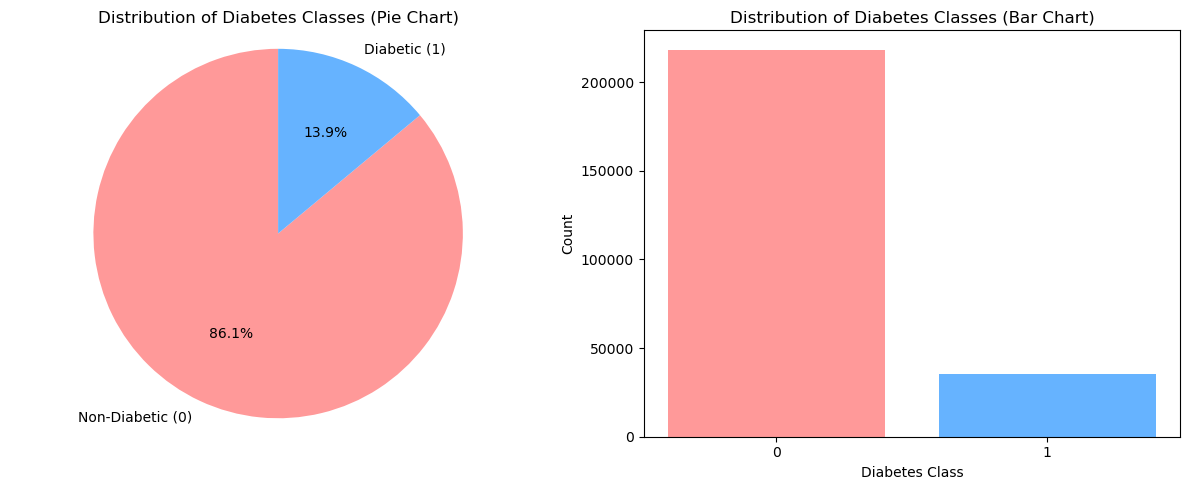

Class Distribution:
Non-Diabetic (0): 218334
Diabetic (1): 35346


In [13]:
# Calculate the distribution of diabetes classes
diabetes_distribution = df_eda['Diabetes_binary'].value_counts()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Pie chart
ax1.pie(diabetes_distribution.values, labels=['Non-Diabetic (0)', 'Diabetic (1)'], autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
ax1.set_title('Distribution of Diabetes Classes (Pie Chart)')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Bar chart
ax2.bar(diabetes_distribution.index.astype(str), diabetes_distribution.values, color=['#ff9999', '#66b3ff'])
ax2.set_title('Distribution of Diabetes Classes (Bar Chart)')
ax2.set_xlabel('Diabetes Class')
ax2.set_ylabel('Count')

# Adjust layout and display the charts
plt.tight_layout()
plt.show()

# Print the exact counts
print("Class Distribution:")
print(f"Non-Diabetic (0): {diabetes_distribution[0]}")
print(f"Diabetic (1): {diabetes_distribution[1]}")


As can be seen from the output above, the dataset is imbalanced, with approximately 86.1% of the samples belonging to the non-diabetic class (0) and 13.9% belonging to the diabetic class (1). This imbalance in the class distribution will need to be considered during the feature engineering phases to ensure fair and accurate predictions for both classes. This imbalance is normal in health-related datasets, as the prevalence of diabetes is lower than the non-diabetic population.

`- 1. Age group with highest prevalence of diabetes`

Here, we can ask the question : "Which age group has the highest prevalence of diabetes?" To answer this question, we can create a bar plot showing the distribution of diabetes cases across different age groups. This will help us identify the age groups with the highest prevalence of diabetes.

First, we should define the age group based on the `Age` column as follows :

In [14]:
# Create age_group column
conditions = [
    (df_eda['Age'] == 1),
    (df_eda['Age'] == 2),
    (df_eda['Age'] == 3),
    (df_eda['Age'] == 4),
    (df_eda['Age'] == 5),
    (df_eda['Age'] == 6),
    (df_eda['Age'] == 7),
    (df_eda['Age'] == 8),
    (df_eda['Age'] == 9),
    (df_eda['Age'] == 10),
    (df_eda['Age'] == 11),
    (df_eda['Age'] == 12),
    (df_eda['Age'] == 13)
]

choices = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']

df_eda['age_group'] = np.select(conditions, choices, default='Unknown')

Now, we can create a bar plot to visualize the distribution of diabetes cases across different age groups.

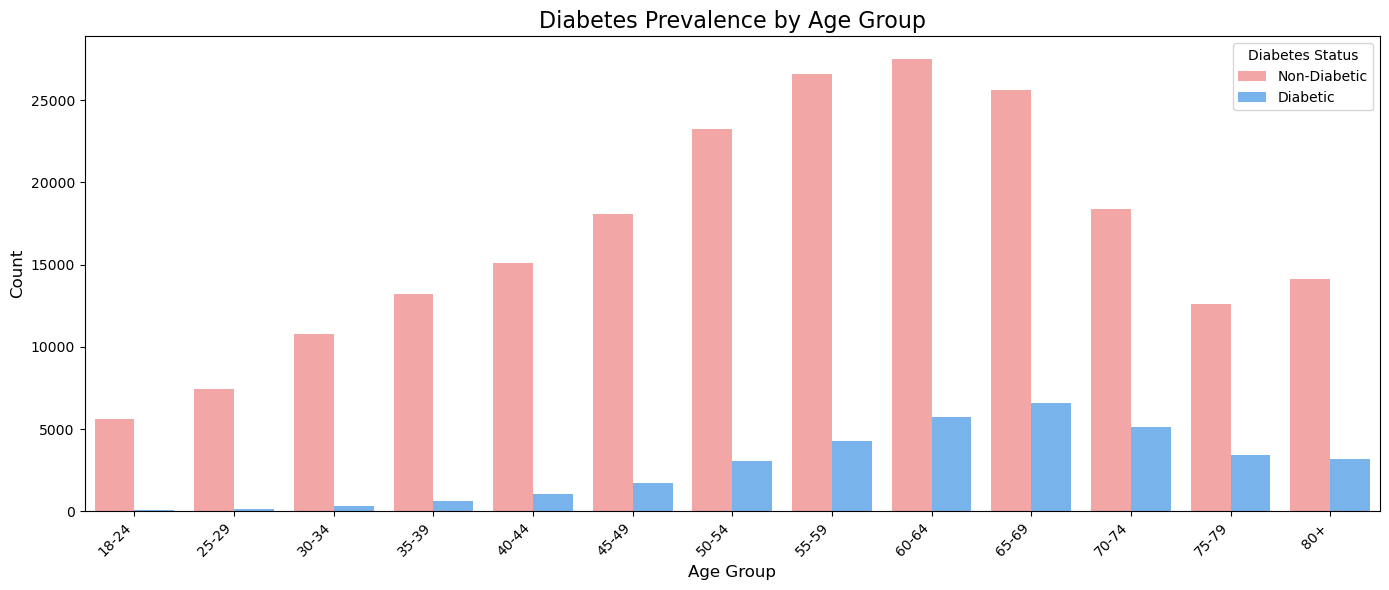

In [15]:
# Define the order of age groups
age_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']

# Define colors
colors = ['#ff9999', '#66b3ff']

# Plot
plt.figure(figsize=(14, 6))
sns.countplot(x='age_group', hue='Diabetes_binary', data=df_eda, order=age_order, palette=colors)
plt.title('Diabetes Prevalence by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(['Non-Diabetic', 'Diabetic'], title='Diabetes Status')
plt.tight_layout()
plt.show()

From the output above, we can see that:
- The **60-64** and **65-69** age groups show the highest prevalence of diabetes.
- While non-diabetic individuals dominate all age groups, the proportion of diabetics rises significantly in the older age ranges.
- Younger age groups **(18-44)** show very low diabetes prevalence.

This visualization makes it clear that diabetes is most prevalent among individuals aged **65-69**. As people age, they are more likely to experience factors that contribute to diabetes, such as **slower metabolism**, **weight gain**, and **decreased physical activity**. The age groups of those also face higher levels of **chronic stress** and **lifestyle-related health issues**, which are known to increase the risk of developing diabetes. Additionally, the accumulation of **unhealthy habits** over time, combined with potential genetic predisposition, could explain the higher prevalence in these age groups.

`- 2. Education level associated with diabetes cases`

Next, we can ask question like : "Which education level is most associated with diabetes cases?" To answer this question, we can create a bar plot showing the distribution of diabetes cases across different education levels. This will help us identify the education levels most associated with diabetes cases.

Same as before, wee should define the education level based on the `Education` column as follows :

In [16]:
# Create a mapping for Education levels
education_mapping = {
    1: 'Never / kindergarten',
    2: 'Elementary school',
    3: 'Junior school',
    4: 'High school Graduate',
    5: 'College',
    6: 'College graduate'
}

# Apply the mapping to create a new column
df_eda['Education_Level'] = df_eda['Education'].map(education_mapping)

# Define the order of education levels
education_order = [
    'Never / kindergarten',
    'Elementary school',
    'Junior school',
    'High school Graduate',
    'College',
    'College graduate'
]

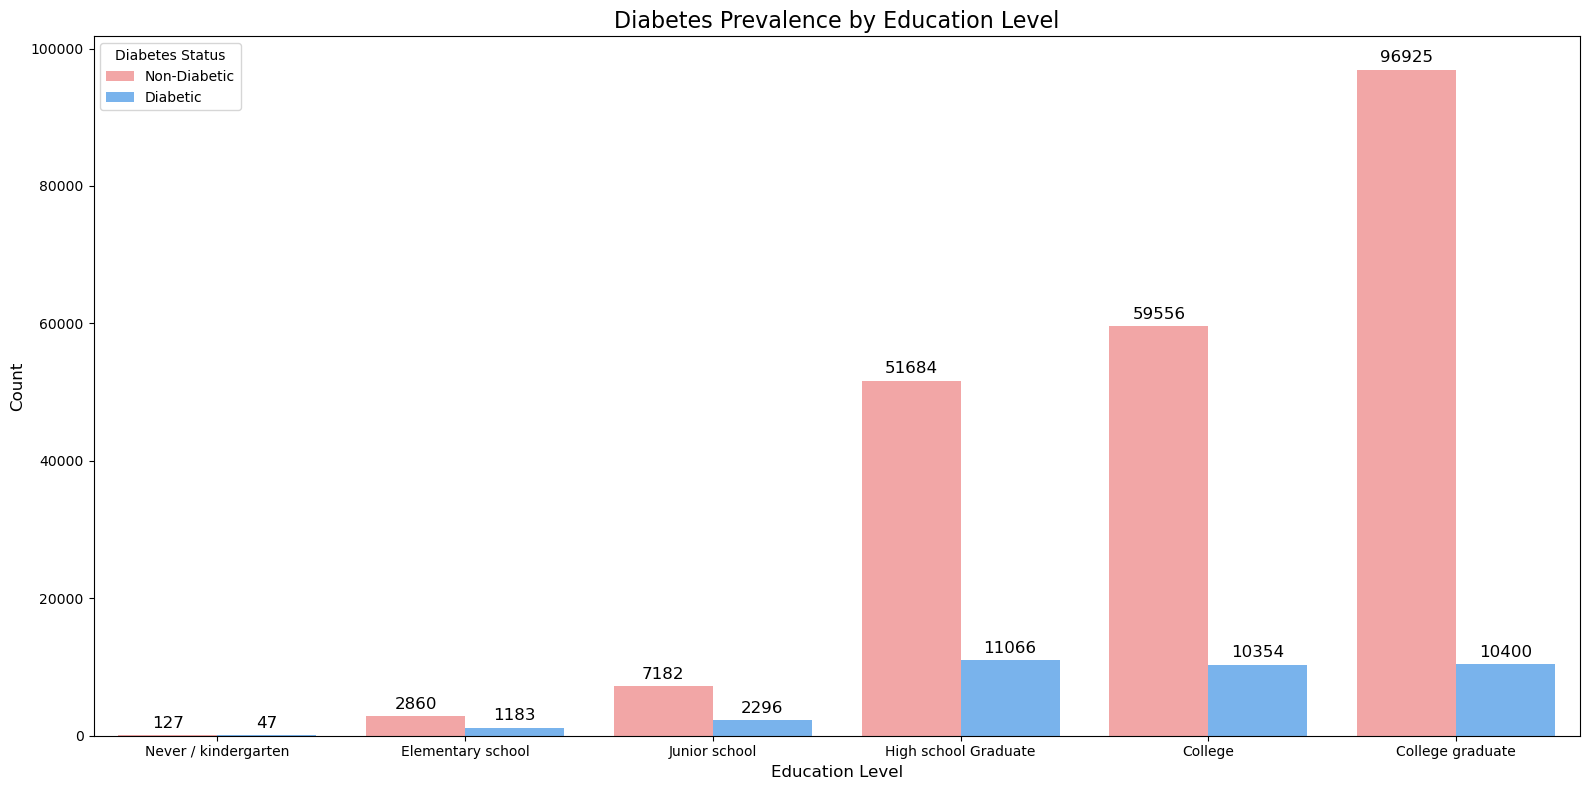

In [17]:
# Create the plot
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='Education_Level', hue='Diabetes_binary', data=df_eda, order=education_order, palette=['#ff9999', '#66b3ff'])
plt.title('Diabetes Prevalence by Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Set x-axis labels
plt.xticks(rotation=0, ha='center', fontsize=10)

# Adjust legend
plt.legend(title='Diabetes Status', labels=['Non-Diabetic', 'Diabetic'])

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fontsize=12, padding=3, fmt='%d')

plt.tight_layout()
plt.show()

The question: **"Which education level is most associated with diabetes cases?"** can be answered by the following insights:

- The bar plot shows that individuals with **high school education** have the highest count of diabetes cases, followed by those with **some college education**.
- Same as before, the non-diabetic dominates over all group.
- The trend suggests a potential link between education levels and higher diabetes prevalence.

Based on this analysis, the education level most associated with diabetes cases is **high school graduates education**. One possible reason for this higher prevalence could be **limited health literacy among high school graduates**, leading to less awareness and understanding of effective health practices related to diet, exercise, and diabetes prevention. **Socioeconomic factors** may also play a role, as those with only a high school education might face financial constraints that limit access to healthier food options, regular medical check-ups, and preventive care. In addition, the types of occupations that high school graduates are more likely to work in may involve **less physical activity or higher levels of stress**, both of which are risk factors for diabetes. Environmental and cultural influences in communities where high school graduates live may also promote less healthy lifestyles or lack resources for physical activities and healthy eating. These combined factors may contribute to the higher prevalence of diabetes in this group.


`- 3. Lifestyle factor most common among those with diabetes`

Here, we can ask question like : "Which lifestyle factor (e.g., smoking, physical inactivity, etc) is most common among those with diabetes?" To answer this question, we can create a bar plot showing the distribution of diabetes cases across different lifestyle factors. This will help us identify the lifestyle factors most common among individuals with diabetes.

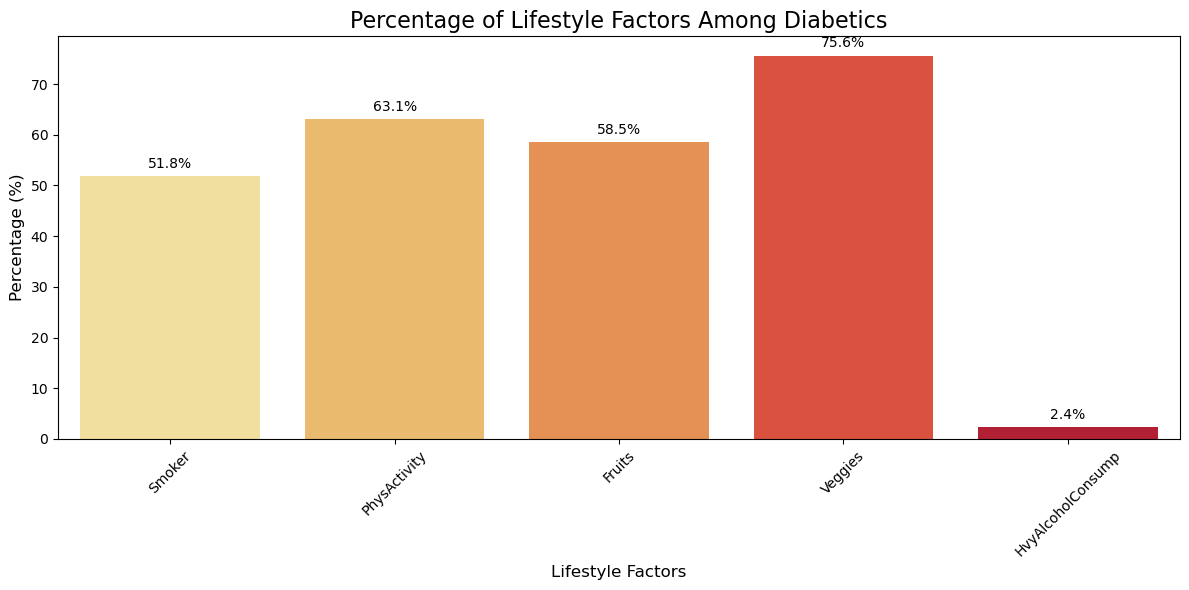

In [18]:
# Calculate percentages of each lifestyle factor among diabetics
diabetic_data = df_eda[df_eda['Diabetes_binary'] == 1]
lifestyle_factors = ['Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump']
lifestyle_percentages = diabetic_data[lifestyle_factors].mean() * 100

# Create a bar plot for percentages
plt.figure(figsize=(12, 6))
sns.barplot(x=lifestyle_percentages.index, y=lifestyle_percentages.values, palette='YlOrRd')
plt.title('Percentage of Lifestyle Factors Among Diabetics', fontsize=16)
plt.xlabel('Lifestyle Factors', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)

# Add percentage labels on top of each bar
for i, v in enumerate(lifestyle_percentages.values):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Based on the bar chart showing the percentage of lifestyle factors among diabetics, the most common factor appears to be low vegetable consumption (Veggies), with 75.6% of diabetics not consuming enough vegetables. While physical inactivity is still a significant factor (63.1%), **low vegetable consumption** is the most prevalent lifestyle factor among diabetics in this dataset.



The chart shows that:

- **Vegetable consumption (Veggies):** 75.6% of diabetics have low vegetable intake.
- **Physical inactivity (PhysActivity):** 63.1% of diabetics are physically inactive.
- **Fruit consumption (Fruits):** 58.5% of diabetics have low fruit intake.
- **Smoking (Smoker):** 51.8% of diabetics are smokers.
- **Heavy alcohol consumption (HvyAlcoholConsump):** Only 2.4% of diabetics engage in heavy alcohol consumption.

Hence, low vegetable consumption is indeed the most common lifestyle factor among diabetics.

One potential reason for the high prevalence of low vegetable consumption among diabetics could be related to dietary habits and access to healthy food options. Vegetables are often more expensive and less convenient to prepare than processed or fast foods, leading to reduced intake, especially among individuals with lower socio-economic status. Additionally, a lack of nutrition education or awareness about the benefits of consuming vegetables might contribute to this issue. For diabetics, dietary management is crucial, but poor dietary choices can worsen blood sugar control and overall health.


Hence, **lifestyle regarding vegetable consumption** is indeed the most common lifestyle factor among diabetics.

`- 4. Health condition most frequently reported among diabetic individuals`

Here, we can ask question like : "Which health condition (e.g., high blood pressure, high cholesterol) is most frequently reported among diabetic individuals?" To answer this question, we can create a bar plot showing the distribution of health conditions among diabetic individuals. This will help us identify the health conditions most frequently reported among diabetics.

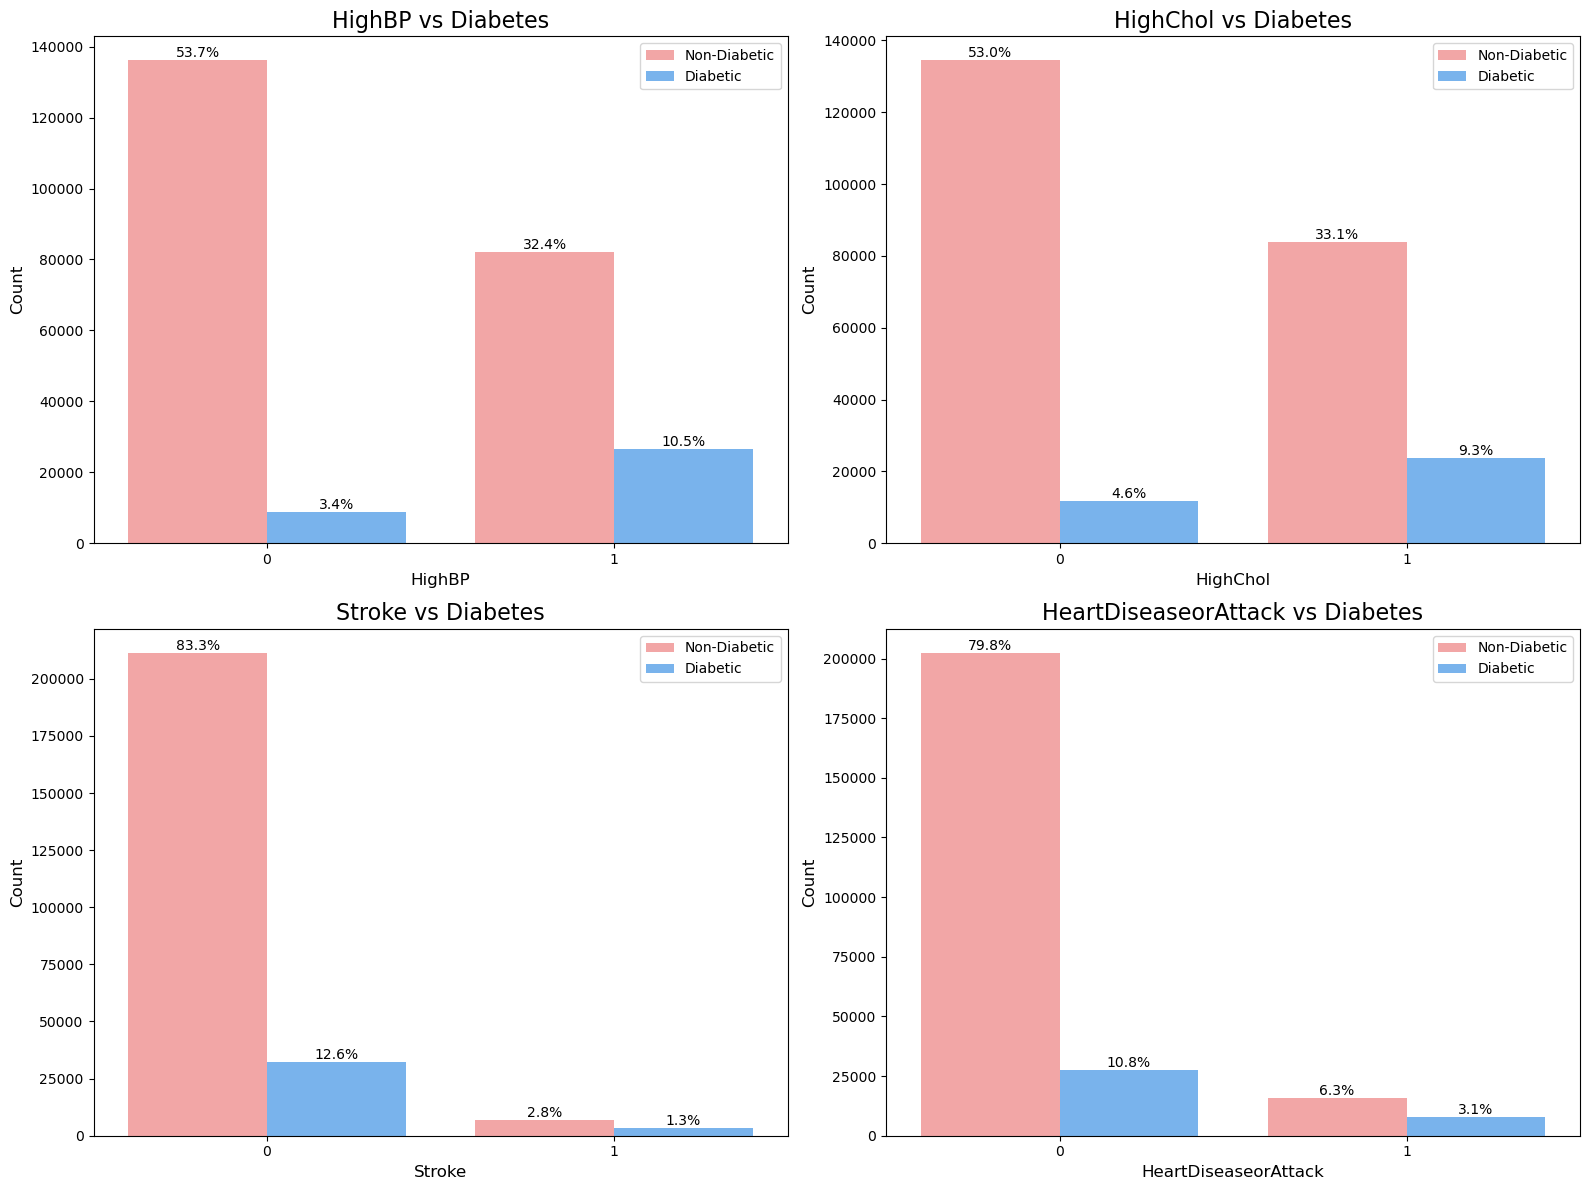

In [19]:
# 4. Health conditions frequently reported among diabetics
health_conditions = ['HighBP', 'HighChol', 'Stroke', 'HeartDiseaseorAttack']
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, condition in enumerate(health_conditions):
    sns.countplot(x=condition, hue='Diabetes_binary', data=df_eda, ax=axes[i], palette=['#ff9999', '#66b3ff'])
    axes[i].set_title(f'{condition} vs Diabetes', fontsize=16)
    axes[i].set_xlabel(condition, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].legend(['Non-Diabetic', 'Diabetic'], fontsize=10)
    
    # Add percentage labels on top of each bar
    total = len(df_eda[condition])
    for p in axes[i].patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        axes[i].annotate(percentage, (x, y), ha='center', va='bottom')

plt.tight_layout()
plt.show()


The chart shows that:

1. **High Blood Pressure (HighBP):** 10.5% of diabetics have high blood pressure.
2. **High Cholesterol (HighChol):** 9.3% of diabetics have high cholesterol.
3. **Heart Disease or Heart Attack (HeartDiseaseorAttack):** 3.1% of diabetics have experienced heart disease or a heart attack.
4. **Stroke:** 1.3% of diabetics have experienced a stroke.

Therefore, high blood pressure is the most common health condition among diabetics.

One possible explanation for these is that diabetics, especially those with type 2 diabetes, often experience insulin resistance and are more likely to be overweight or obese. Excess weight contributes to increased blood pressure due to added strain on the heart and blood vessels.

`- 5. Demographic group with highest proportion of diabetes cases`

Here, we can ask question like : "Which demographic group (income) has the highest proportion of diabetes cases?" To answer this question, we can create a bar plot showing the distribution of diabetes cases across different income levels. This will help us identify the income levels with the highest proportion of diabetes cases.

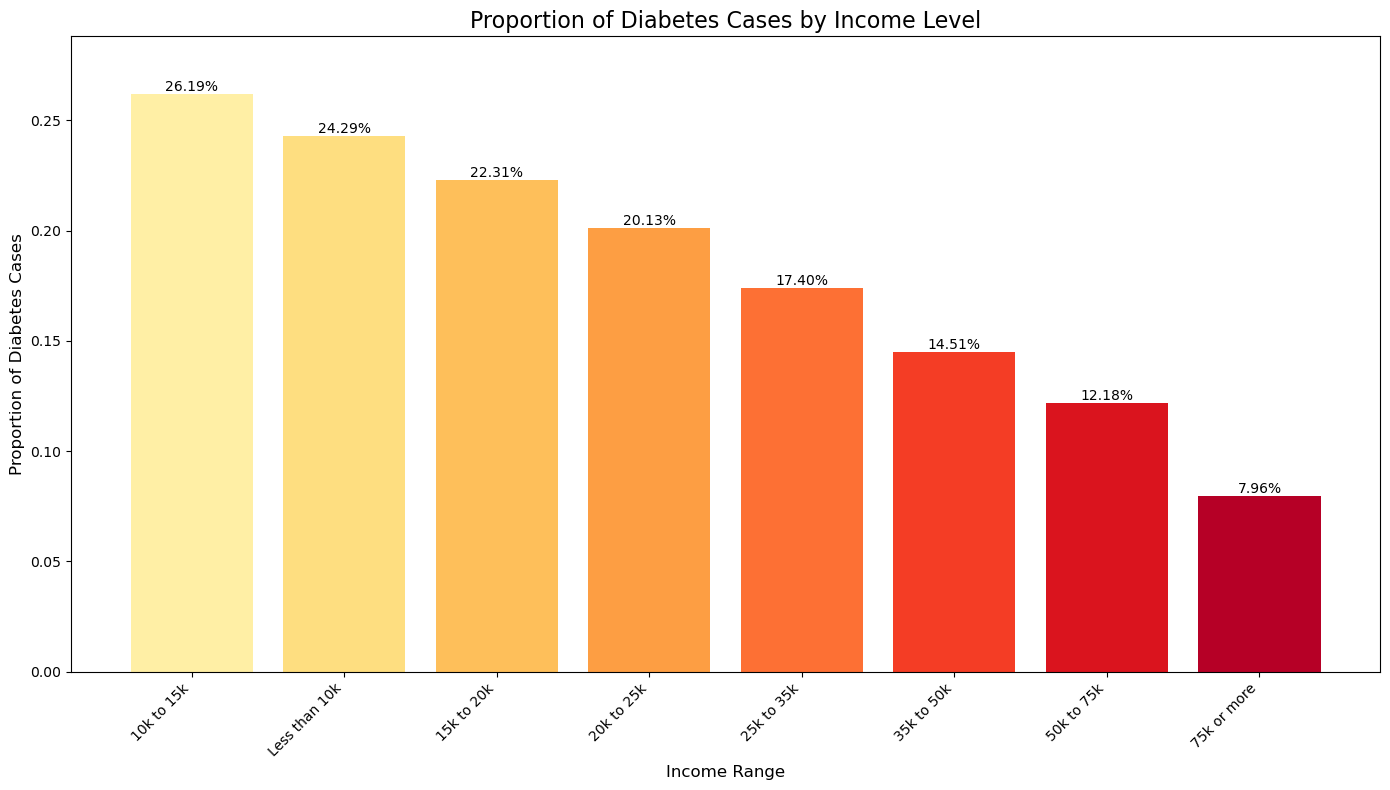

The income range with the highest proportion of diabetes cases is '10k to 15k'
with a proportion of 26.19%


In [20]:
# Create a mapping for income levels
income_mapping = {
    1: 'Less than 10k',
    2: '10k to 15k',
    3: '15k to 20k',
    4: '20k to 25k',
    5: '25k to 35k',
    6: '35k to 50k',
    7: '50k to 75k',
    8: '75k or more'
}

# Apply the mapping to create a new column
df_eda['Income_Range'] = df_eda['Income'].map(income_mapping)

# Calculate the proportion of diabetes cases for each income level
diabetes_by_income = df_eda.groupby('Income_Range')['Diabetes_binary'].mean().sort_values(ascending=False)

# Create a color palette
colors = sns.color_palette("YlOrRd", n_colors=len(diabetes_by_income))

# Create the bar plot
plt.figure(figsize=(14, 8))
bars = plt.bar(diabetes_by_income.index, diabetes_by_income.values, color=colors)

# Customize the plot
plt.title('Proportion of Diabetes Cases by Income Level', fontsize=16)
plt.xlabel('Income Range', fontsize=12)
plt.ylabel('Proportion of Diabetes Cases', fontsize=12)
plt.ylim(0, max(diabetes_by_income.values) * 1.1)  # Set y-axis limit with some padding
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2%}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print the income level with the highest proportion of diabetes cases
highest_income_level = diabetes_by_income.index[0]
highest_proportion = diabetes_by_income.values[0]
print(f"The income range with the highest proportion of diabetes cases is '{highest_income_level}'")
print(f"with a proportion of {highest_proportion:.2%}")

The visualization reveals a clear **inverse relationship** between income levels and the proportion of diabetes cases:

1. **Highest Prevalence**: The income range "$10,000 to $15,000" has the highest proportion of diabetes cases at **26.19%**, closely followed by "Less than $10,000" at **24.29%**.
2. **Decreasing Trend**: There's a consistent decrease in the proportion of diabetes cases as income levels increase. This trend is particularly steep from the lowest income brackets to the middle-income ranges.
3. **Lowest Prevalence**: The "$75,000 or more" income bracket shows the lowest proportion of diabetes cases at **7.96%**, which is significantly lower than the highest prevalence group.
4. **Middle Income Range**: The middle-income brackets (e.g., "$25,000 to $35,000" and "$35,000 to $50,000") show moderate levels of diabetes prevalence, ranging from **17.40%** to **20.13%**.
5. **Socioeconomic Impact**: This data strongly suggests that socioeconomic factors play a significant role in diabetes prevalence. **Lower-income groups** appear to be at a much higher risk of diabetes compared to **higher-income groups**.

Potential Explanations:
- **Access to Healthcare**: Lower-income groups may have limited access to preventive healthcare services and regular check-ups.
- **Dietary Factors**: Lower-income individuals might have less access to nutritious food options and may rely more on cheaper, processed foods that can contribute to diabetes risk.
- **Lifestyle Factors**: Higher-income groups may have more resources for maintaining healthier lifestyles, including better diet and regular exercise.
- **Stress Levels**: Chronic stress associated with financial instability in lower-income groups could contribute to higher diabetes risk.
- **Education**: There might be a correlation between income and education levels, with higher education potentially leading to better health awareness and practices.

`- 6. Correlation between BMI and likelihood of diabetes`

Here, we can ask question like : "How does BMI correlate with the likelihood of diabetes?" To answer this question, we can create a box plot to visualize the relationship between BMI and the likelihood of diabetes. This will help us understand how BMI levels are associated with the risk of diabetes.

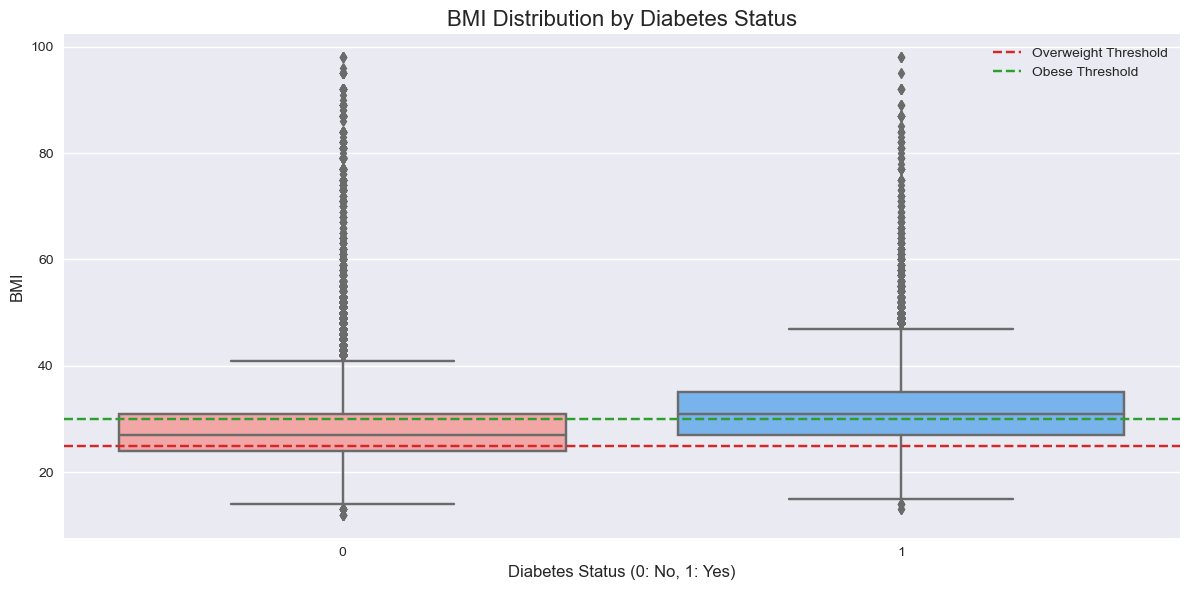

Median BMI for diabetics: 31.00
Median BMI for non-diabetics: 27.00
Mean BMI for diabetics: 31.94
Mean BMI for non-diabetics: 27.81


In [21]:
# Set the style for the plot
plt.style.use('seaborn')

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Diabetes_binary', y='BMI', data=df_eda, palette=['#ff9999', '#66b3ff'])

# Customize the plot
plt.title('BMI Distribution by Diabetes Status', fontsize=16)
plt.xlabel('Diabetes Status (0: No, 1: Yes)', fontsize=12)
plt.ylabel('BMI', fontsize=12)

# Add a horizontal line at BMI = 25 (overweight threshold) and BMI = 30 (obese threshold)
plt.axhline(y=25, color='#d62728', linestyle='--', label='Overweight Threshold')
plt.axhline(y=30, color='#2ca02c', linestyle='--', label='Obese Threshold')

plt.legend()
plt.tight_layout()
plt.show()

# Calculate and print some statistics
diabetic_bmi = df_eda[df_eda['Diabetes_binary'] == 1]['BMI']
non_diabetic_bmi = df_eda[df_eda['Diabetes_binary'] == 0]['BMI']

print(f"Median BMI for diabetics: {diabetic_bmi.median():.2f}")
print(f"Median BMI for non-diabetics: {non_diabetic_bmi.median():.2f}")
print(f"Mean BMI for diabetics: {diabetic_bmi.mean():.2f}")
print(f"Mean BMI for non-diabetics: {non_diabetic_bmi.mean():.2f}")

To answer the question "How does BMI correlate with the likelihood of diabetes?", we created a box plot visualization to examine the relationship between BMI levels and diabetes status.

1. **Higher BMI in Diabetics**: The median BMI for individuals with diabetes (1) is noticeably higher than for those without diabetes (0). The box representing diabetics is positioned higher on the BMI scale.

2. **Obesity Threshold**: A significant portion of the BMI distribution for diabetics is above the obesity threshold (BMI > 30), indicated by the green dashed line. The median for diabetics appears to be above this line, while for non-diabetics it's below.

3. **Overweight Threshold**: The majority of both diabetics and non-diabetics have a BMI above the overweight threshold (BMI > 25), shown by the red dashed line. However, a larger proportion of diabetics fall above this line.

4. **Wider Distribution**: The BMI distribution for diabetics shows a wider range, particularly extending higher, suggesting more variability in BMI among diabetics.

5. **Outliers**: Both groups show outliers at high BMI levels, but diabetics have more extreme high BMI outliers, reaching up to BMI values of nearly 100.

6. **Overlap**: There is some overlap in the BMI distributions of diabetics and non-diabetics, indicating that while BMI is a strong indicator, it's not the sole determinant of diabetes risk.

The visualization strongly suggests that **higher BMI is correlated with an increased likelihood of diabetes**. This could be true because the higher BMI may lead to the higher consumption of glucose, therefore, resulting in person with diabetes.

`- 7. Relationship between mental health and diabetes risk`

Here, we can ask question like `What is the relationship between mental health (days of poor mental health) and diabetes risk?` To answer this question, we can create a box plot to visualize the relationship between mental health days and the likelihood of diabetes. This will help us understand how mental health issues are associated with the risk of diabetes.

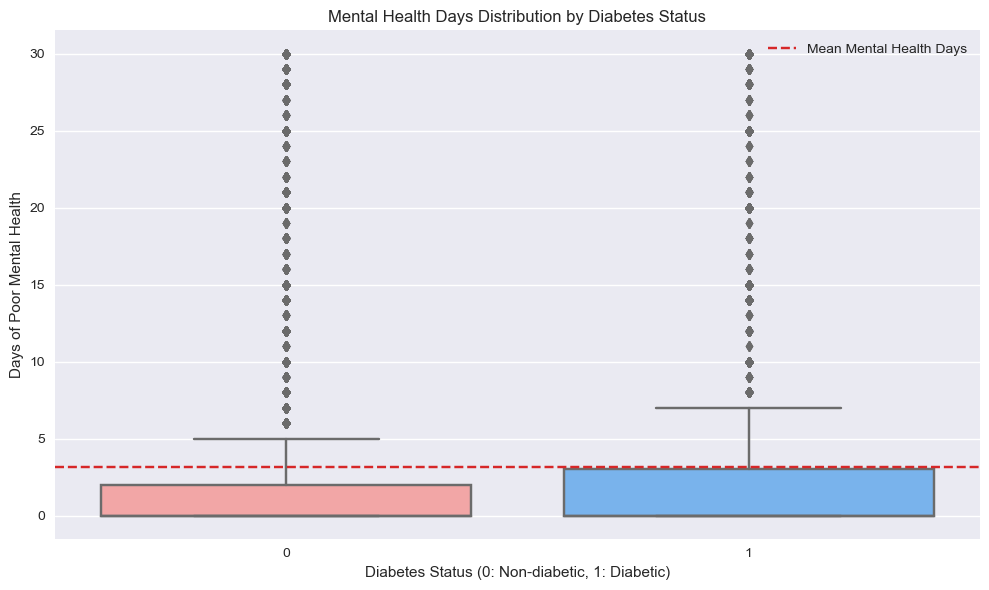

Mean Mental Health Days for diabetics: 4.46
Mean Mental Health Days for non-diabetics: 2.98


In [22]:
# 7. Relationship between mental health and diabetes risk
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes_binary', y='MentHlth', data=df_eda, palette=['#ff9999', '#66b3ff'])
plt.title('Mental Health Days Distribution by Diabetes Status')
plt.xlabel('Diabetes Status (0: Non-diabetic, 1: Diabetic)')
plt.ylabel('Days of Poor Mental Health')

# Add a horizontal line at the mean mental health days
mean_mental_health = df_eda['MentHlth'].mean()
plt.axhline(y=mean_mental_health, color='#d62728', linestyle='--', label='Mean Mental Health Days')

plt.legend()
plt.tight_layout()
plt.show()

# Calculate and print some statistics
diabetic_mental_health = df_eda[df_eda['Diabetes_binary'] == 1]['MentHlth']
non_diabetic_mental_health = df_eda[df_eda['Diabetes_binary'] == 0]['MentHlth']


print(f"Mean Mental Health Days for diabetics: {diabetic_mental_health.mean():.2f}")
print(f"Mean Mental Health Days for non-diabetics: {non_diabetic_mental_health.mean():.2f}")


The median number of poor mental health days is the same for both diabetics and non-diabetics (0 days), which suggests that the majority of both groups do not report frequent poor mental health days. However, the mean number of poor **mental health days is higher** for diabetics (4.46 days) compared to non-diabetics (2.98 days).

1. Diabetics, on average, report more days of poor mental health (4.46 days) compared to non-diabetics (2.98 days). This suggests that individuals with diabetes may experience more frequent mental health challenges than those without diabetes.

2. The box plot illustrates that while the median number of poor mental health days is low for both groups, diabetics tend to have a wider distribution, with more individuals reporting higher numbers of poor mental health days.

3. The presence of outliers, particularly among diabetics, indicates that a subset of this group may experience significantly more days of poor mental health.

One possible reason for this is **Chronic Stress and Anxiety**, Managing diabetes can be mentally taxing, leading to chronic stress, anxiety, and feelings of depression. The constant monitoring of blood sugar levels, dietary restrictions, and fear of complications can negatively impact mental health.Therefore, while the median mental health days are similar for both diabetics and non-diabetics, the higher mean and wider distribution among diabetics indicate that they are more likely to experience frequent poor mental health days. The challenges of managing a chronic condition like diabetes likely contribute to this increased mental health burden.

## V. Feature Engineering


Having completed an in-depth exploration and analysis of the dataset, we now move on to the feature engineering phase. This crucial step involves carefully preprocess our data for our model and transforming them into an appropriate format. By doing so, we ensure that our data is optimally prepared for the subsequent model training process.

### V.I Split Features and Targets

Next, we can define our `X` as our features and `y` as our target

In [23]:
# Define features (X) and target (y)
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

Now we can see what is X and y as follows :

In [24]:
# Display the first few rows of X to see the features
print("Features (X):")
X.head()

Features (X):


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4


In [25]:
# Display the first few rows of y to see the features
print("Target (y):")
y.head()

Target (y):


0    0
1    0
2    0
3    0
4    0
Name: Diabetes_binary, dtype: int64

We can see that we have succesfully divide our features (X) and target (y). Next we can split between train and test set.

### V.II Split Train and Test Set

Next up, we will split train and test set with 70% vs 30%. Here, the combination also can be chosen with 80% vs 20% too but since we have a lot of data, so 70% of training set already suitable for our model training. The amount of splitting ratio can be chosen based on what you needs. Here, we will chose the 70:30 ratio. By testing on a larger portion of the data (30% instead of 20%), we will get a better insight into how our model performs across different subsets of the data.

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training set shape: (177576, 21)
Testing set shape: (76104, 21)
Training target shape: (177576,)
Testing target shape: (76104,)


Next up, we can see how our train and test looks like

In [27]:
# Print train and test shape
print('Train Size :', X_train.shape)
print('Test Size :', X_test.shape)

# Show first few rows of the variable 
X_train.head()

Train Size : (177576, 21)
Test Size : (76104, 21)


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
231121,0,1,1,22,1,0,0,1,1,1,...,1,0,2,0,0,0,0,12,6,6
145098,0,1,1,23,1,0,0,1,1,1,...,1,0,2,0,3,1,0,7,4,8
101727,0,0,1,27,0,0,0,1,0,1,...,1,0,1,0,0,0,1,8,6,7
229088,1,0,1,28,1,0,0,1,1,1,...,1,0,2,7,0,0,0,3,6,6
228686,0,0,1,26,1,0,0,1,1,1,...,1,0,1,0,0,0,0,5,6,8


The data is split into training and testing sets using `train_test_split` with a test size of 0.3, meaning the training set now contains 70% of the data, or 177,576 rows, while the test set contains 30% of the data, or 76,104 rows. The `stratify` parameter is used to ensure an even distribution of diabetic and non-diabetic cases between the training and testing sets.

### V.III Missing Value Handling

Next up, we will handle the missing value in our dataframe if there are any

In [28]:
# check missing value in train set
missing_values = X_train.isnull().sum()
print("Missing values in training set:\n", missing_values)

Missing values in training set:
 HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [29]:
# check missing value in test set
missing_values = X_test.isnull().sum()
print("Missing values in test set:\n", missing_values)

Missing values in test set:
 HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


Based on the output from the previous cells, we can see that there are **no missing values** in either our **training or testing datasets**. Specifically, when we checked for missing values using the `isnull().sum()` method on both `X_train` and `X_test`, all columns returned a count of **0**. This indicates that our dataset is **complete** and every cell contains a value. 

The **absence of missing values** is **advantageous** for our analysis as it means we **don't need to implement any missing value handling techniques** such as **imputation** or **deletion of rows/columns**. This **completeness** in our data ensures that we can proceed **directly** to other preprocessing steps or model building without the need to address data gaps.

However, it's important to note that while we don't have missing values, we should still be **vigilant** about other potential **data quality issues** such as **outliers** or **inconsistencies** in the data, which we will address in subsequent steps of our analysis.

### V.IV Outlier Handling

Following the management of missing values, it's crucial to address outliers as they can substantially affect the performance and dependability of both statistical analyses and machine learning models. The process begins by identifying which columns require outlier detection and treatment. We typically remove categorical columns from this process due to their non-numerical nature. Moreover, we also exclude numerical columns with few unique values, as their limited range of values may hold significance for our analysis.

In [30]:
# Check the number of unique values in each numerical column
# First, filter numerical_cols to only include columns present in X_train
numerical_columns = [col for col in numerical_cols if col in X_train.columns]
unique_counts = X_train[numerical_columns].nunique()
print("Number of unique values in each numerical column:")
print(unique_counts)


Number of unique values in each numerical column:
BMI         80
MentHlth    31
PhysHlth    31
dtype: int64


Next up, we will count how many percentage of outliers that we have. In this case, if the percentage of outliers is >= 5% we will do capping method, else we will chose between trimming/capping. 

In [31]:
# Define a function to calculate the percentage of outliers using IQR method
def calculate_outlier_percentage(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return (len(outliers) / len(data)) * 100

# Calculate and print the percentage of outliers for each numerical column
for col in numerical_columns:
    outlier_percentage = calculate_outlier_percentage(X_train, col)
    print(f"Percentage of outliers in {col}: {outlier_percentage:.2f}%")


Percentage of outliers in BMI: 3.89%
Percentage of outliers in MentHlth: 14.32%
Percentage of outliers in PhysHlth: 16.12%


Looking at the output above, column `BMI` has 3.89% outliers, `MentHlth` has 14.32% outliers, and `PhysHlth` has 16.12% outliers. These percentages indicate that there are significant outliers in these numerical columns, particularly in `MentHlth` and `PhysHlth`. While the `BMI` has <5% outliers, I personally think that we should just cap the value (not trimming), especially since `BMI` is one of the most important features for determining diabetes if we used our domain knowledge, therefore dropping the data would be very dangerous because one data is very important for us, especially on that features. Therefore, we will trim that feature. The presence of these outliers could potentially impact our analysis and model performance, so it's important to address them in our data preprocessing steps.


Firstly, we should check the skewness of the numerical columns to identify potential outliers. This will help us understand the distribution of our data and determine which columns might need further investigation or treatment for outliers. After analyzing the skewness, we can then proceed with appropriate outlier detection and handling techniques based on the characteristics of each column.

In [32]:
# Calculate skewness for numerical columns
skewness = X_train[numerical_columns].skew()

print("Skewness of numerical columns:")
print(skewness)


Skewness of numerical columns:
BMI         2.115132
MentHlth    2.717074
PhysHlth    2.207737
dtype: float64


It turns out that all the numerical columns in our dataset exhibit **extreme skewness**, as their skewness values are all **greater than 1**

These **highly skewed distributions** indicate the presence of significant **outliers** in all three columns. Given this information, we will use the following approach, we will apply the **Interquartile Range (IQR) method** with **3 folds** using **winsorization**. This method will help us handle outliers while preserving the overall distribution of the data.

Next steps: Implement the **IQR method with 3 folds using winsorization** for 'BMI', 'MentHlth', and 'PhysHlth'. After applying the outlier handling technique, we should reassess the distributions to ensure the skewness has been reduced and the data is more suitable for our modeling process. We may need to apply the same transformation to our test data to maintain consistency. By addressing these extreme outliers, we aim to improve the reliability and performance of our subsequent analyses and machine learning models.

In [33]:
# handle outliers using Winsorizer from feature-engine
from feature_engine.outliers import Winsorizer

# Define columns to winsorize
columns_to_winsorize = ['BMI', 'MentHlth', 'PhysHlth']

# Initialize Winsorizer
winsorizer = Winsorizer(capping_method='iqr', 
                        tail='both', 
                        fold=3, 
                        variables=columns_to_winsorize)

# Backup original X_train before outlier handler only for visualization
X_train_ori = X_train

# Fit and transform the training data
X_train = winsorizer.fit_transform(X_train)

# Transform the test data
X_test = winsorizer.transform(X_test)

# Recalculate skewness after winsorization
skewness_after = X_train[columns_to_winsorize].skew()

print("Skewness after winsorization:")
print(skewness_after)

Skewness after winsorization:
BMI         1.127869
MentHlth    1.540586
PhysHlth    1.499813
dtype: float64


The results of our winsorization process show a significant **reduction in skewness** for the numerical columns `'BMI'`, `'MentHlth'`, and `'PhysHlth'`. This improvement in the distribution of these variables is crucial for our subsequent modeling steps.

These improvements in data distribution are visually confirmed by the **bar plot**, which shows the skewness values after winsorization. All three variables now have skewness values **closer to zero**, indicating more symmetric distributions.

By addressing these outliers, we have prepared our data for more **robust and reliable analysis**. The winsorized dataset is now better suited for machine learning algorithms, which often assume a certain level of normality or at least symmetry in the input variables. This preprocessing step is likely to **enhance the performance and reliability** of our predictive models for diabetes.

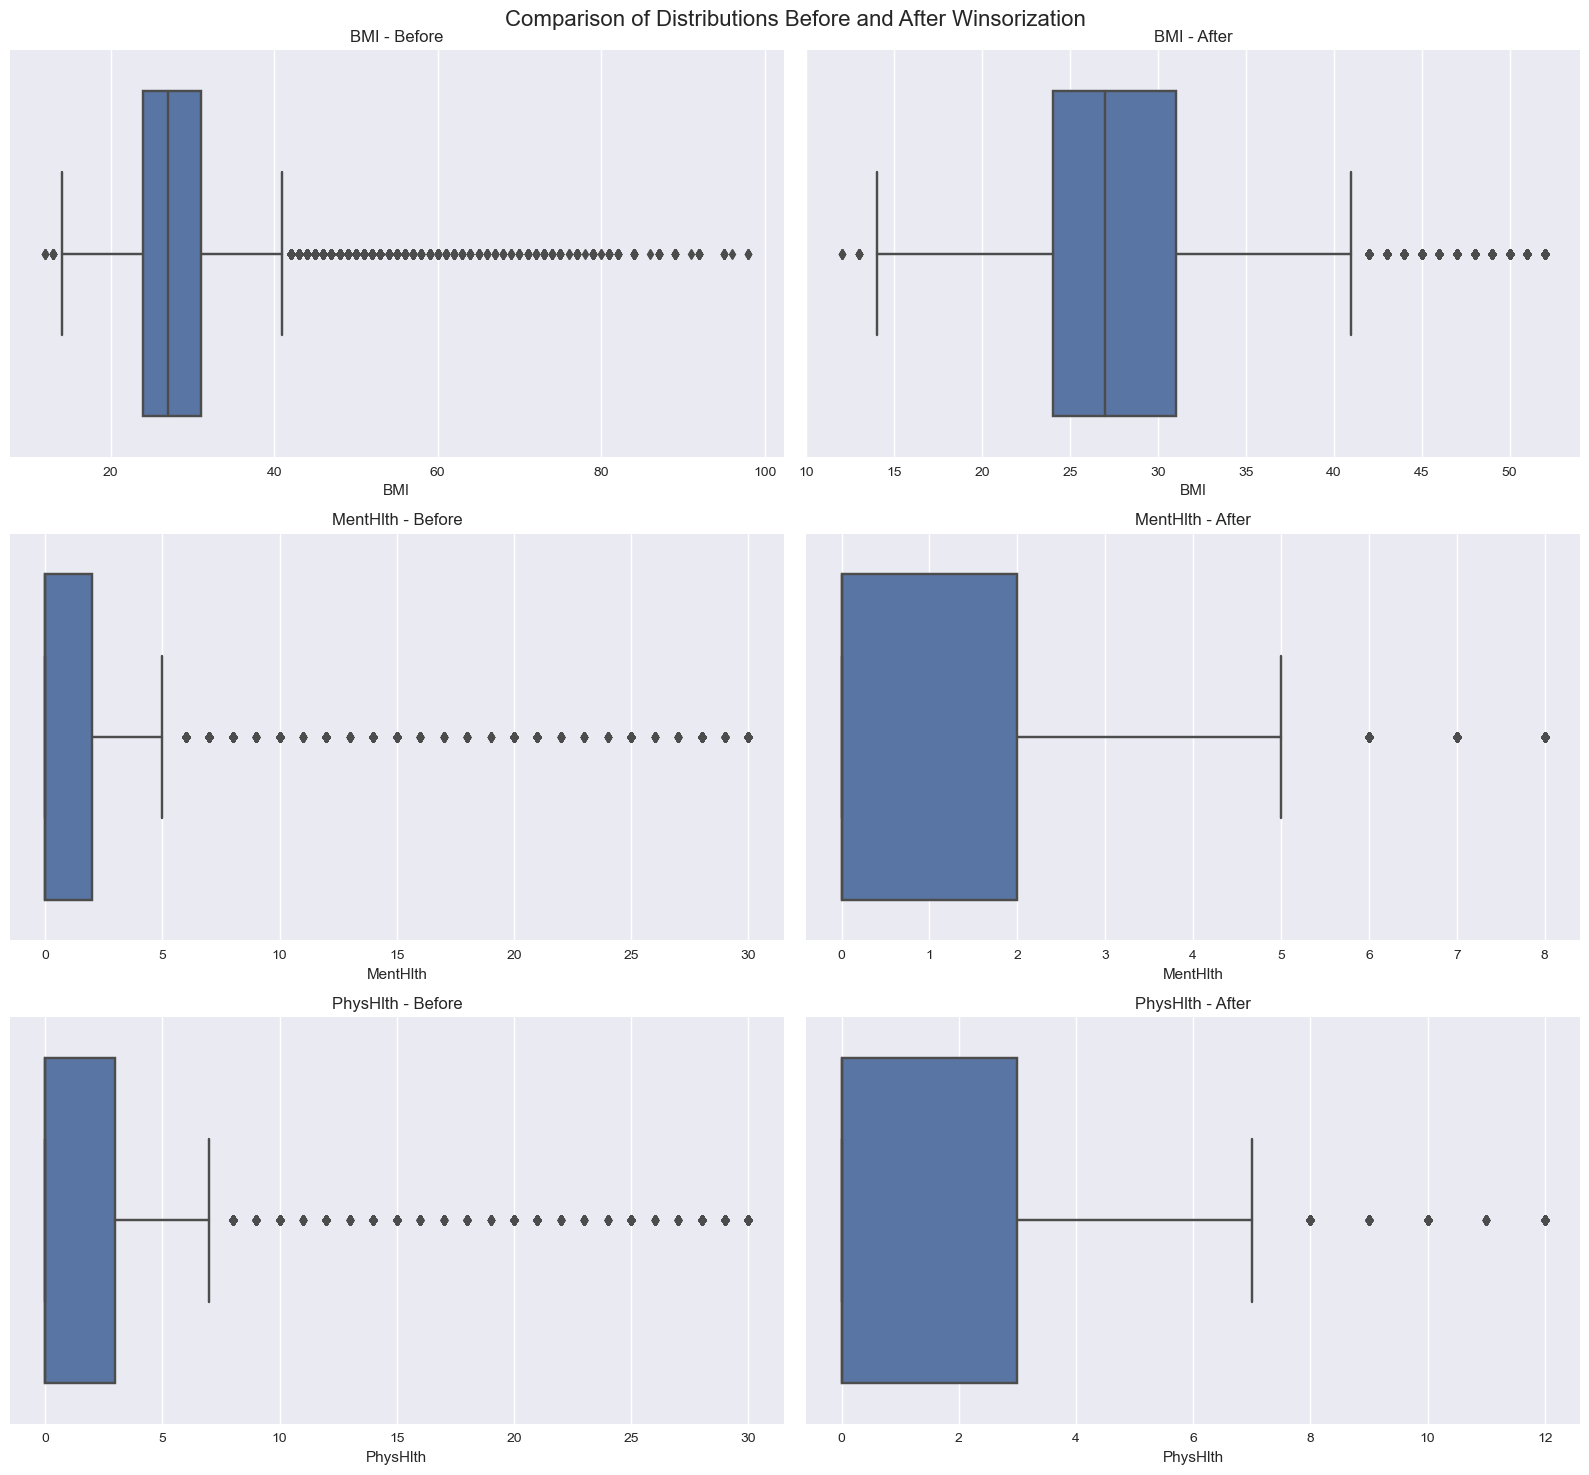

In [34]:
# Compare before and after winsorization using box plots
fig, axes = plt.subplots(len(columns_to_winsorize), 2, figsize=(16, 5*len(columns_to_winsorize)))
fig.suptitle('Comparison of Distributions Before and After Winsorization', fontsize=16)

for i, column in enumerate(columns_to_winsorize):
    # Before winsorization
    sns.boxplot(x=X_train_ori[column], ax=axes[i, 0])
    axes[i, 0].set_title(f'{column} - Before')
    axes[i, 0].set_xlabel(column)
    
    # After winsorization
    sns.boxplot(x=X_train[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'{column} - After')
    axes[i, 1].set_xlabel(column)

plt.tight_layout()
plt.show()


Based on the output above, we can see the **comparison** between **before vs after outlier handling** using **box plots** for the columns `BMI`, `MentHlth`, and `PhysHlth`. The plots clearly demonstrate the **effect of winsorization**:

1. **BMI**: The box plot shows a **reduction in extreme outliers**, particularly on the upper end of the distribution. The **whiskers are shorter** after winsorization, indicating a **more compact range** of values.
2. **MentHlth**: There's a **noticeable decrease** in the number of outliers, especially on the upper end. The box (representing the **interquartile range**) appears **more proportionate** to the overall distribution after winsorization.
3. **PhysHlth**: Similar to MentHlth, there's a **significant reduction** in outliers. The distribution appears **more balanced** after winsorization, with **fewer extreme values**.

Overall, these visualizations **confirm** that our winsorization process has **effectively addressed outliers**, resulting in **more symmetrical and compact distributions** for these key variables. This **preprocessing step** should contribute to **more robust and reliable model performance** in our subsequent analysis.

### V.V Feature selection

Next up, we will use phik correlation to do feature selection. The phik correlation is a statistical measure that can detect both linear and non-linear relationships between variables. This method is particularly useful for our dataset as it can handle both categorical and numerical features.

Here's why we're choosing phik correlation:
1. It's versatile, working well with mixed data types in our dataset.
2. It can uncover non-linear relationships that might be missed by traditional correlation methods.
3. It provides a normalized measure between 0 and 1, making it easy to interpret and compare across different feature pairs.

By using phik correlation, we aim to:
- Identify the most relevant features for predicting diabetes.
- Reduce dimensionality of our dataset, which can help prevent overfitting.
- Potentially improve model performance by focusing on the most informative features.

Let's proceed with calculating the phik correlations and visualizing the results.

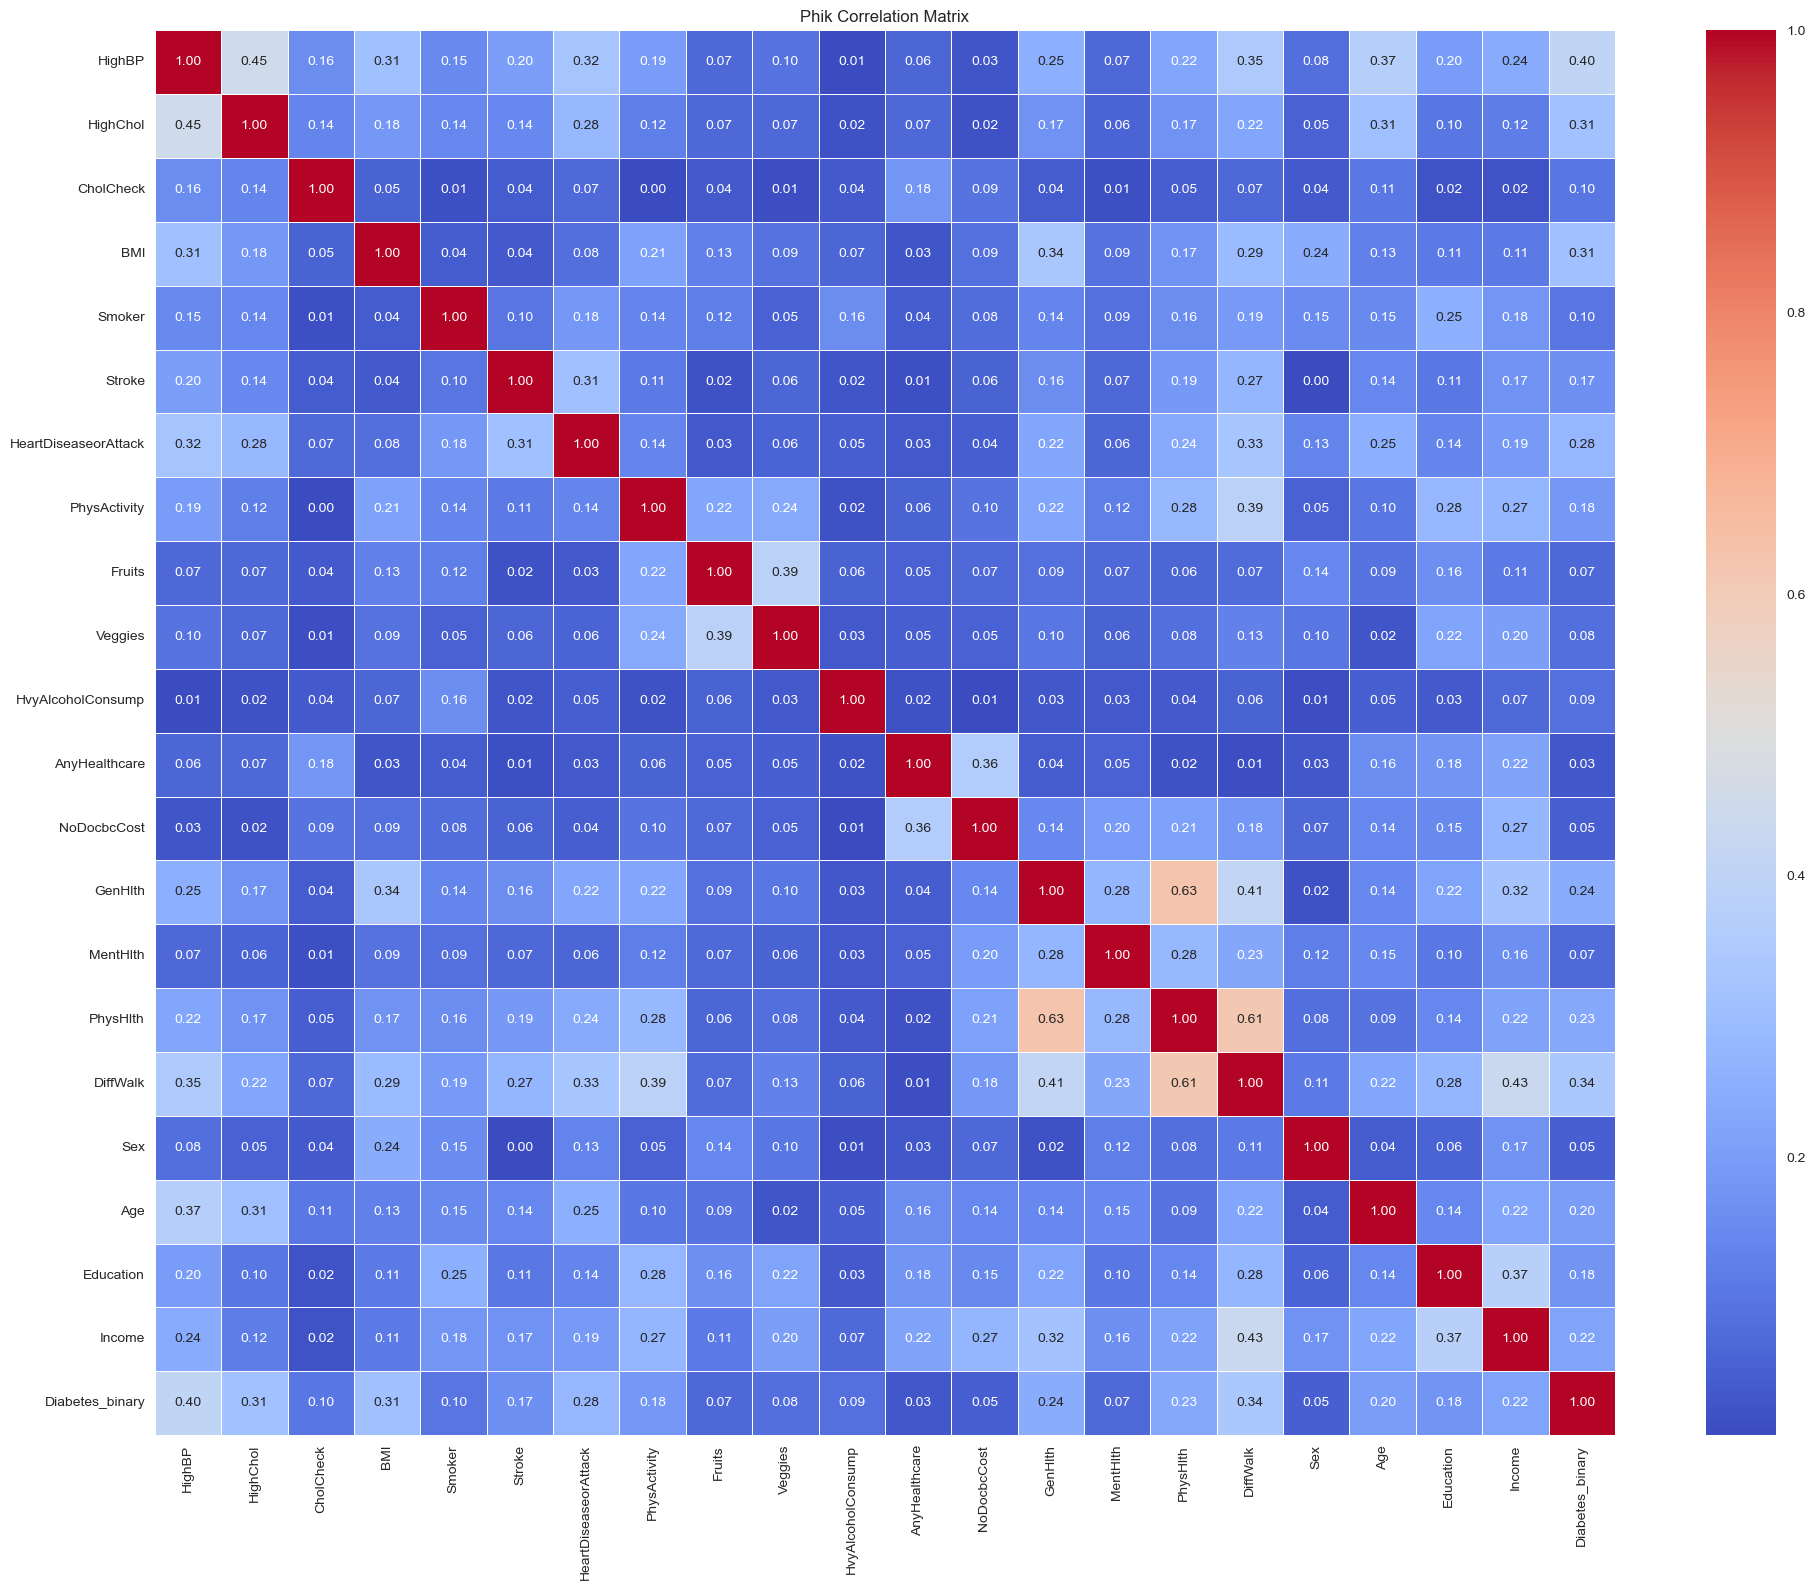

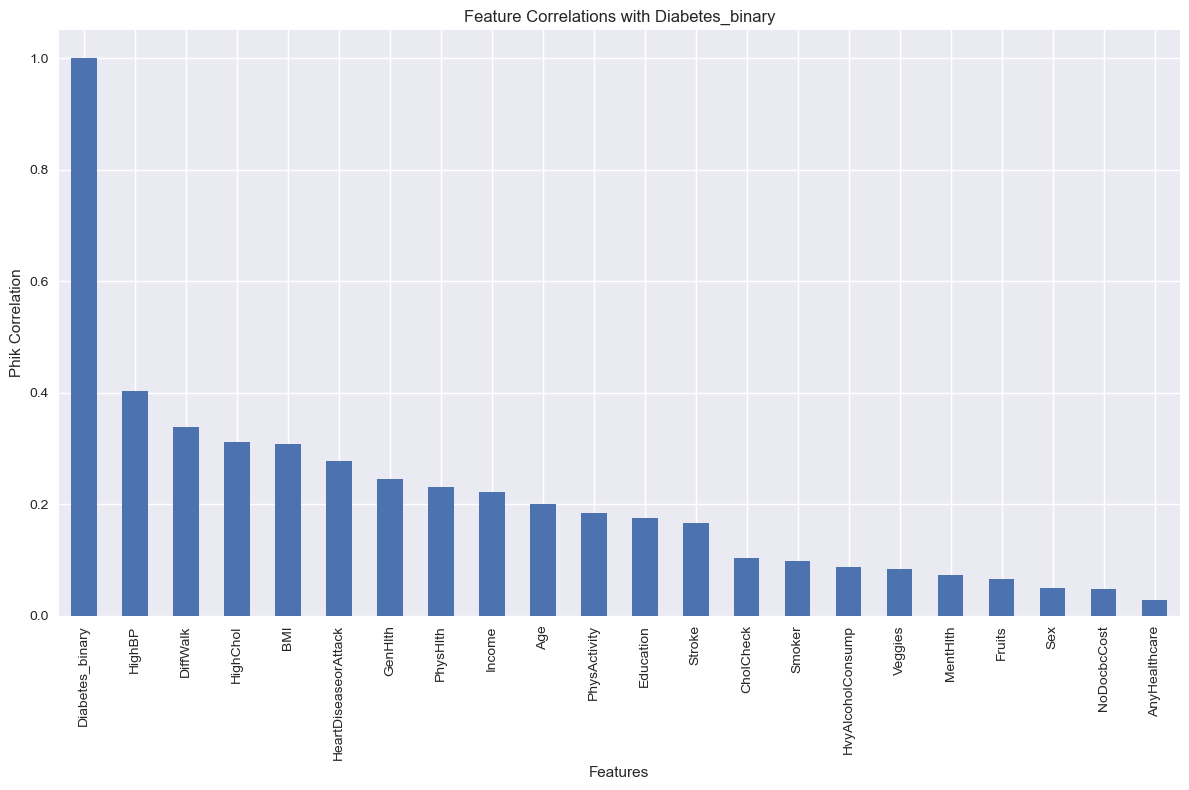

Top 10 features correlated with Diabetes_binary:
Diabetes_binary         1.000000
HighBP                  0.403092
DiffWalk                0.339124
HighChol                0.311770
BMI                     0.308174
HeartDiseaseorAttack    0.277308
GenHlth                 0.244487
PhysHlth                0.231023
Income                  0.221026
Age                     0.200341
Name: Diabetes_binary, dtype: float64


In [35]:
# Create a temporary df for phik
temp_df = pd.concat([X_train, y_train], axis=1)

# Calculate the phik correlation matrix
phik_matrix = temp_df.phik_matrix(interval_cols=numerical_columns)

# Create a heatmap of the phik correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Phik Correlation Matrix')
plt.tight_layout()
plt.show()

# Get the correlation with the target variable
target_correlations = phik_matrix['Diabetes_binary'].sort_values(ascending=False)

# Plot the correlations with the target variable
plt.figure(figsize=(12, 8))
target_correlations.plot(kind='bar')
plt.title('Feature Correlations with Diabetes_binary')
plt.xlabel('Features')
plt.ylabel('Phik Correlation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Print the top 10 correlated features
print("Top 10 features correlated with Diabetes_binary:")
print(target_correlations.head(10))


Based on the phik correlation matrix and feature correlations with the target variable `Diabetes_binary`, we can draw several insights:

The phik correlation analysis reveals several key insights about diabetes risk factors. Strong health indicators like `HighBP` and `BMI` show the highest correlation with `Diabetes_binary`, suggesting a **strong association** between **hypertension**, **obesity**, and **diabetes risk**. Other significant factors include mobility issues `DiffWalk`, general health `GenHlth`, cardiovascular health `HeartDiseaseorAttack`, `HighChol`, and overall physical well-being `PhysHlth`. Interestingly, socioeconomic factors like `Income` and demographic factors like `Age` also appear among the top correlated features. This ranking provides **valuable guidance** for **feature selection** in our predictive model, while also highlighting potential **feature interactions** or **multicollinearity** that we should consider during model development.


Looking at the output of the bar charts, we can see the **feature with lowest corelation** with our target is `AnyHealthcare`. This features means if the person have any kind of health care coverage or not. Well, even tho the correlation of this feature is close to zero, we shouldn't drop this feature because from **other prespective** this feature might have valuable information to our predicted target. Therefore, we won't drop any features in our data. 

***Note*** : The choice of dropping features depends on the author, **personally**, even if the feature has very low correlation with the target, that feature still can has a valuable information for other features. That is why I'm not a big fan of selecting feature using statistical method which draw a naive assumption that each features treated as independent with other features. Statistical methods often focus on the individual importance of features and may not capture interactions between features. These interactions can be crucial for understanding the underlying relationships in the data. For example here : `AnyHealthcare` might interact with other features to influence the likelihood of diabetes. For instance, the effect of having healthcare coverage might be different for people with a family history of diabetes compared to those without, also, feature `Income` is correlated with `AnyHealthcare` feature, and that feature is on our list of the top 10 correlated features with target. So in the end, we won't drop any features here.


### V.VI Cardinality Handling

Next, we will check the cardinality of categorical columns in our dataset. This step is crucial for understanding the distribution of unique values in each categorical feature, which can inform our feature engineering and modeling decisions.


Cardinality and Unique Values of Categorical Columns:
Age: Cardinality = 13, Unique Values = [9, 7, 11, 10, 8, 13, 4, 6, 2, 12, 5, 1, 3]
Income: Cardinality = 8, Unique Values = [3, 1, 8, 6, 4, 7, 2, 5]
Education: Cardinality = 6, Unique Values = [4, 6, 3, 5, 2, 1]
GenHlth: Cardinality = 5, Unique Values = [5, 3, 2, 4, 1]
HighBP: Cardinality = 2, Unique Values = [1, 0]
HighChol: Cardinality = 2, Unique Values = [1, 0]
CholCheck: Cardinality = 2, Unique Values = [1, 0]
Smoker: Cardinality = 2, Unique Values = [1, 0]
Stroke: Cardinality = 2, Unique Values = [0, 1]
HeartDiseaseorAttack: Cardinality = 2, Unique Values = [0, 1]
PhysActivity: Cardinality = 2, Unique Values = [0, 1]
Fruits: Cardinality = 2, Unique Values = [0, 1]
Veggies: Cardinality = 2, Unique Values = [1, 0]
HvyAlcoholConsump: Cardinality = 2, Unique Values = [0, 1]
AnyHealthcare: Cardinality = 2, Unique Values = [1, 0]
NoDocbcCost: Cardinality = 2, Unique Values = [0, 1]
DiffWalk: Cardinality = 2, Unique Values = [1, 0]
S

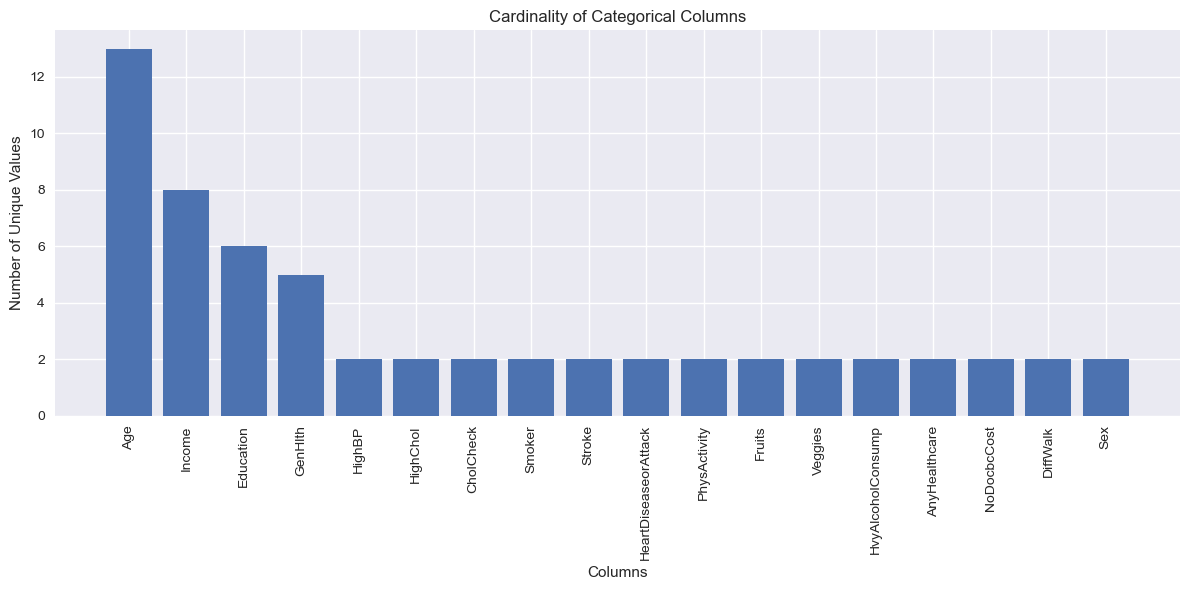

In [36]:
# Identify categorical columns
categorical_columns = [col for col in X.columns if col in categorical_cols]

# Check cardinality and unique values for categorical columns
cardinality = {}
unique_values = {}
for col in categorical_columns:
    cardinality[col] = X[col].nunique()
    unique_values[col] = X[col].unique()

# Sort the cardinality dictionary by value in descending order
sorted_cardinality = dict(sorted(cardinality.items(), key=lambda x: x[1], reverse=True))

# Print the cardinality and unique values for each categorical column in a compact format
print("Cardinality and Unique Values of Categorical Columns:")
for col, card in sorted_cardinality.items():
    unique_vals = ', '.join(map(str, unique_values[col]))
    print(f"{col}: Cardinality = {card}, Unique Values = [{unique_vals}]")

# Visualize the cardinality
plt.figure(figsize=(12, 6))
plt.bar(sorted_cardinality.keys(), sorted_cardinality.values())
plt.title('Cardinality of Categorical Columns')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Looking at the output above, the categorical columns that has the highest cardinality is `Age`, that column is an encoded categorical column. The highest cardinality value is **13**, therefore, we won't do any dropping method or transforming those features since we can see that features that has <20 cardinality can be treated as low cardinality features. Even here, the `Age` column was originally a numerical column that has been encoded by the author of the dataset using his own method of binning. So we won't drop it or changing the value to hold its true meaning.

### V.VII Imbalanced Data Handling

Next, we will address the **imbalanced data** issue identified during our EDA process using an **appropriate method**. Our analysis revealed that the target variable `Diabetes_binary` is significantly imbalanced, with a **disproportionate ratio** of negative cases (non-diabetic patients) to positive cases (diabetic patients).

Given that our dataset contains **over 200,000 samples** and the imbalance is approximately almost **90% vs 10%**, we will employ **RandomUnderSampler** as our chosen technique. This method is particularly suitable for large datasets where we can afford to remove some majority class samples without significant loss of information.

RandomUnderSampler will **randomly remove samples** from the majority class (non-diabetic patients) to achieve a more balanced distribution. This approach is computationally efficient and helps prevent our model from being biased towards the majority class.

By balancing our dataset, we aim to **improve the performance** of our machine learning models, especially in accurately identifying the minority class (diabetic patients). This step is crucial for developing a model that can reliably predict diabetes risk across all patient groups.

In [37]:
# Define RandomUnderSampler to handle imbalance data
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Resample training data using RandomUnderSampler
X_resample, y_resample = undersampler.fit_resample(X_train, y_train)

The Random Under Sampler technique is exclusively applied to the **training dataset**. We intentionally leave the test data unaltered to ensure our model retains its capability to make accurate predictions on real-world, imbalanced data. This approach allows us to evaluate the model's performance on a dataset that closely mirrors the actual distribution of cases in the population.

In [38]:
# Calculate value counts and percentages
value_counts = y_resample.value_counts()
total_samples = len(y_resample)

# Function to format output string
def format_output(label, count, percentage):
    return f"{label}: {count} --> {percentage:.2f}% of the dataset"

# Print formatted results
print(format_output("Non-Diabetic", value_counts[0], (value_counts[0] / total_samples) * 100))
print(format_output("Diabetic", value_counts[1], (value_counts[1] / total_samples) * 100))

Non-Diabetic: 24742 --> 50.00% of the dataset
Diabetic: 24742 --> 50.00% of the dataset


After applying **Random Under Sampling**, we can observe that our dataset is now **perfectly balanced**:

This **balanced distribution** will help our model learn **equally** from both classes, potentially **improving** its ability to predict diabetes cases **accurately**. It's important to note that while we've balanced our **training data**, our **test data** remains in its **original, imbalanced state**. This approach allows us to train on a **balanced dataset** while still evaluating our model's performance on a dataset that reflects the **real-world distribution** of diabetes cases.

### V.VIII Pipeline Feature Engineering

Next up, we will create a **pipeline** for **scaling** and **one-hot encoding**. Here, the **numerical columns** will be **scaled** using an appropriate method, while **one-hot encoding** will be applied only to the `Sex` feature since it's defined as 'Male' or 'Female'. This pipeline will help us **preprocess** our data efficiently, ensuring that all features are in the correct format for our machine learning models. The scaling step will **normalize** our numerical features, preventing any single feature from **dominating** the others due to differences in scale. Meanwhile, the one-hot encoding of the `Sex` feature will **convert** this categorical variable into a format that our models can interpret, creating separate **binary columns** for each category. Other categorical features are **already encoded** so we won't use any transformation for those.

Firstly, we will define which columns will be processed in pipeline

In [39]:
# Numerical columns for scaling
numerical_columns = numerical_columns

# Ohe features for encode with ohe
categorical_columns_ohe = ['Sex']

Next up, we will define the method for each columns that will be processed. Notice that all our numerical columns is **not normally distributed** (having > 1 skew (we checked it already before)) and **bounded** (eg., days from 0-30). Therefore, we will use **`MinMaxScaler`()** for our numerical columns and **`One-Hot-Encoder`** as our encoding method.

In [40]:
# Create MinMaxScaler for numerical columns
scaler = MinMaxScaler()

# Create OneHotEncoder for categorical columns
ohe = OneHotEncoder(sparse=False, drop='first')

# Create the preprocessing pipeline
preprocess = ColumnTransformer(
    transformers=[
        ('num', scaler, numerical_columns),
        ('cat', ohe, categorical_columns_ohe)
    ],
    remainder='passthrough')

# show preprocess
preprocess

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', MinMaxScaler(),
                                 ['BMI', 'MentHlth', 'PhysHlth']),
                                ('cat',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['Sex'])])

## VI. Model Definition


After preprocessing all features, we move on to model definition. This analysis employs six distinct models, each chosen for specific reasons:

1. **K-Nearest Neighbors (KNN)**: 
   This model is ideal for datasets where strong assumptions about data distribution are not necessary.
2. **Support Vector Classifier (SVC)**: 
   Its versatility makes it effective for both linearly and non-linearly separable data in this dataset.
3. **Logistic Regression**: 
   A simple yet robust model, providing interpretable results and well-suited for binary classification tasks like ours.
4. **Decision Tree**: 
   This model excels at capturing complex data relationships and offers easy interpretability.
5. **Random Forest**: 
   An ensemble method that combines multiple decision trees, enhancing accuracy and mitigating overfitting.
6. **XGBoost**: 
   A powerful gradient boosting algorithm, particularly adept at handling imbalanced data, making it highly suitable for this analysis.

These models offer a diverse range of approaches, allowing us to thoroughly explore and analyze our dataset from different perspectives.

In this analysis, we prioritize **Recall** as our primary evaluation metric. Our goal is to develop a model that excels at identifying diabetes cases accurately. We place a **`strong emphasis on minimizing False Negatives`** - instances where the model incorrectly predicts non-diabetes when diabetes is actually present. Consequently, we favor **Recall** over Precision in our approach.

In [41]:
# Define model using pipeline with all default hyperparameters

pipe_knn = Pipeline(steps=[('preprocess', preprocess), ('classifier', KNeighborsClassifier())])
pipe_svc = Pipeline(steps=[('preprocess', preprocess), ('classifier', SVC(random_state=42))])
pipe_log = Pipeline(steps=[('preprocess', preprocess), ('classifier', LogisticRegression(random_state=42))])
pipe_dt = Pipeline(steps=[('preprocess', preprocess), ('classifier', DecisionTreeClassifier(random_state=42))])
pipe_rf = Pipeline(steps=[('preprocess', preprocess), ('classifier', RandomForestClassifier(random_state=42))])
pipe_xgb = Pipeline(steps=[('preprocess', preprocess), ('classifier', XGBClassifier(random_state=42))])

## VII. Model Training


To identify the top-performing model among the six candidates, we employ **cross-validation**, a robust technique for assessing model performance and generalization capabilities. This method involves:

1. **Partitioning** the dataset into multiple subsets
2. **Training** the model on a portion of the data
3. **Testing** it on the remaining subset
4. **Repeating** this process several times

This approach allows us to:
- Evaluate the model's performance on **unseen data**
- **Mitigate overfitting** risks

For our cross-validation process, we utilize the `StratifiedKFold` function. This choice is strategic as it:
- **Preserves the class distribution** within each fold
- Ensures each fold contains a **representative sample** of all target classes

By maintaining consistent class ratios across folds, we enhance the reliability and robustness of our model evaluation process.

In [42]:
# Initialize stratified cross-validation splitter
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for each model
cv_results_knn = cross_val_score(pipe_knn, X_resample, y_resample, cv=stratified_cv, scoring='recall', n_jobs=-1)
cv_results_svc = cross_val_score(pipe_svc, X_resample, y_resample, cv=stratified_cv, scoring='recall', n_jobs=-1)
cv_results_log = cross_val_score(pipe_log, X_resample, y_resample, cv=stratified_cv, scoring='recall', n_jobs=-1)
cv_results_dt = cross_val_score(pipe_dt, X_resample, y_resample, cv=stratified_cv, scoring='recall', n_jobs=-1)
cv_results_rf = cross_val_score(pipe_rf, X_resample, y_resample, cv=stratified_cv, scoring='recall', n_jobs=-1)
cv_results_xgb = cross_val_score(pipe_xgb, X_resample, y_resample, cv=stratified_cv, scoring='recall', n_jobs=-1)

Now, we can see the output for each cross validation

In [43]:
# Initialize lists and variables to store results
model_results = []
best_model = ''
best_cv_score = 0

# Iterate through each model's cross-validation results
for cv, name in zip([cv_results_log, cv_results_svc, cv_results_knn, cv_results_dt, cv_results_rf, cv_results_xgb],
                    ['Logistic Regression', 'SVC', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost']):
    # Calculate mean and standard deviation of cross-validation scores
    mean_cv = cv.mean()
    std_cv = cv.std()
    
    # Append results for each model
    model_results.append([
        name,
        [f"{score:.2f}" for score in cv],
        f"{mean_cv:.2f}",
        f"{std_cv:.3f}",
        f"{mean_cv - std_cv:.2f} - {mean_cv + std_cv:.2f}"
    ])
    
    # Update best model if current model has higher mean score
    if mean_cv > best_cv_score:
        best_cv_score = mean_cv
        best_model = name

# Create DataFrame with results
df_results = pd.DataFrame(model_results, columns=[
    'Model', 'Recall - All CV', 'Recall - Mean CV', 'Recall - Std CV', 'Recall - Range CV'
])

# Display results as a formatted table
print(tabulate(df_results.values.tolist(), headers=df_results.columns, tablefmt='pipe', showindex=False))

# Print best model and its cross-validation mean score
print(f"\nBest Model: `{best_model}`")
print(f"Cross Validation Mean from Best Model: `{best_cv_score:.2f}`")

| Model               | Recall - All CV                          |   Recall - Mean CV |   Recall - Std CV | Recall - Range CV   |
|:--------------------|:-----------------------------------------|-------------------:|------------------:|:--------------------|
| Logistic Regression | ['0.77', '0.76', '0.77', '0.77', '0.77'] |               0.77 |             0.003 | 0.76 - 0.77         |
| SVC                 | ['0.82', '0.81', '0.82', '0.82', '0.82'] |               0.82 |             0.005 | 0.81 - 0.82         |
| KNN                 | ['0.72', '0.71', '0.72', '0.71', '0.72'] |               0.72 |             0.004 | 0.71 - 0.72         |
| Decision Tree       | ['0.64', '0.66', '0.64', '0.64', '0.65'] |               0.65 |             0.006 | 0.64 - 0.65         |
| Random Forest       | ['0.78', '0.77', '0.77', '0.77', '0.78'] |               0.77 |             0.006 | 0.77 - 0.78         |
| XGBoost             | ['0.78', '0.77', '0.79', '0.78', '0.79'] |               0.78 |   

Based on the output above, we can see that **Support Vector Machine (SVM)** is selected as our best baseline model. Therefore, we will proceed with this model for further evaluation and fine-tuning. The SVM model demonstrated the highest mean cross-validation score of **`0.82`**, indicating its robust performance across different subsets of our data.

This result suggests that the SVM model consistently outperformed other algorithms in predicting diabetes cases, with a recall score of 0.82. This means that, on average, our model correctly identified 82% of the actual diabetes cases across various data subsets during cross-validation. Such a high recall is particularly valuable in medical contexts where identifying potential diabetes cases is crucial for early intervention and management to **minimize the false negative**.

The SVM algorithm's superior performance can be attributed to its ability to find an optimal hyperplane that separates different classes in high-dimensional space. This approach often leads to better generalization, especially in datasets with complex relationships between features and when dealing with binary classification problems like diabetes prediction.

Next steps:

1. **Hyperparameter Tuning**: Perform hyperparameter optimization on the SVM model to potentially improve its performance.
2. **Test Set Evaluation**: Evaluate the tuned SVM model on the test set to assess its generalization ability.

This approach will help us refine our SVM model and potentially improve its already strong performance in identifying diabetes cases, aiming to enhance both its accuracy and interpretability in the medical context. By focusing on diabetes prediction, we can contribute to early detection and prevention strategies, potentially improving patient outcomes and reducing the burden on healthcare systems

Therefore, we will train our data using that model as follows

In [44]:
# Train our best model
pipe_svc.fit(X_resample,y_resample)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['BMI', 'MentHlth',
                                                   'PhysHlth']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Sex'])])),
                ('classifier', SVC(random_state=42))])

Next, we can see the prediction in train vs test using our best model (SVM). Now that we have trained our SVM model using the best hyperparameters, we can evaluate its performance on both the training and test sets. This comparison will help us assess how well our model generalizes to unseen data.

In [45]:
# Get predictions for both training and test data using the SVM model
y_pred_train = pipe_svc.predict(X_resample)
y_pred_test = pipe_svc.predict(X_test)

The SVM pipeline model generates predictions for both the training and test datasets. The variable `y_pred_train` stores the predictions for the resampled training data (`X_resample`), whereas `y_pred_test` holds the predictions for the test data (`X_test`). This approach allows us to evaluate the model's performance on both familiar and unseen data, providing insights into its generalization capabilities.

## VIII. Model Evaluation


In this section, we will:

1. **Assess the performance** of our fitted model
2. **Conduct hyperparameter tuning** to optimize the model's parameters

These steps are crucial for evaluating how well our model performs on the given data and Improving the model's performance and efficiency through parameter optimization.

### VIII.I Best Model

In [46]:
# Print recall score
print('Recall Score - Train Set  : {:.2f}'.format(recall_score(y_resample, y_pred_train)))
print('Recall Score - Test Set   : {:.2f}'.format(recall_score(y_test, y_pred_test)))

Recall Score - Train Set  : 0.82
Recall Score - Test Set   : 0.82


The Recall scores for the SVM model on both the train and test sets demonstrate **consistent performance**, indicating its **effectiveness** in predicting diabetes cases. A Recall score of `0.82` on both the train and test sets implies that the model successfully identified a **significant proportion** of true diabetes cases among all actual diabetes cases. This consistency between train and test performance suggests that the model **generalizes well** to unseen data and can be seen as a **`"GOOD FIT"`** model.

The Recall score of `0.82` is particularly **important** in healthcare applications where the focus is on **minimizing False Negatives**, ensuring that individuals at risk of diabetes are **correctly identified** and provided with appropriate care and intervention. While there is still room for improvement, this performance indicates that the SVM model is **reasonably effective** in predicting diabetes outcomes, capturing a **minority** of the positive cases.

Overall, the SVM model shows **promising and consistent performance** across both training and test datasets, which is a **good indicator** of its **reliability** in predicting diabetes outcomes. However, further optimization could potentially **enhance** its predictive capabilities.

Classification Report - Train Set:
              precision    recall  f1-score   support

           0       0.79      0.68      0.73     24742
           1       0.72      0.82      0.77     24742

    accuracy                           0.75     49484
   macro avg       0.76      0.75      0.75     49484
weighted avg       0.76      0.75      0.75     49484


Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.96      0.68      0.79     65500
           1       0.29      0.82      0.43     10604

    accuracy                           0.70     76104
   macro avg       0.62      0.75      0.61     76104
weighted avg       0.87      0.70      0.74     76104



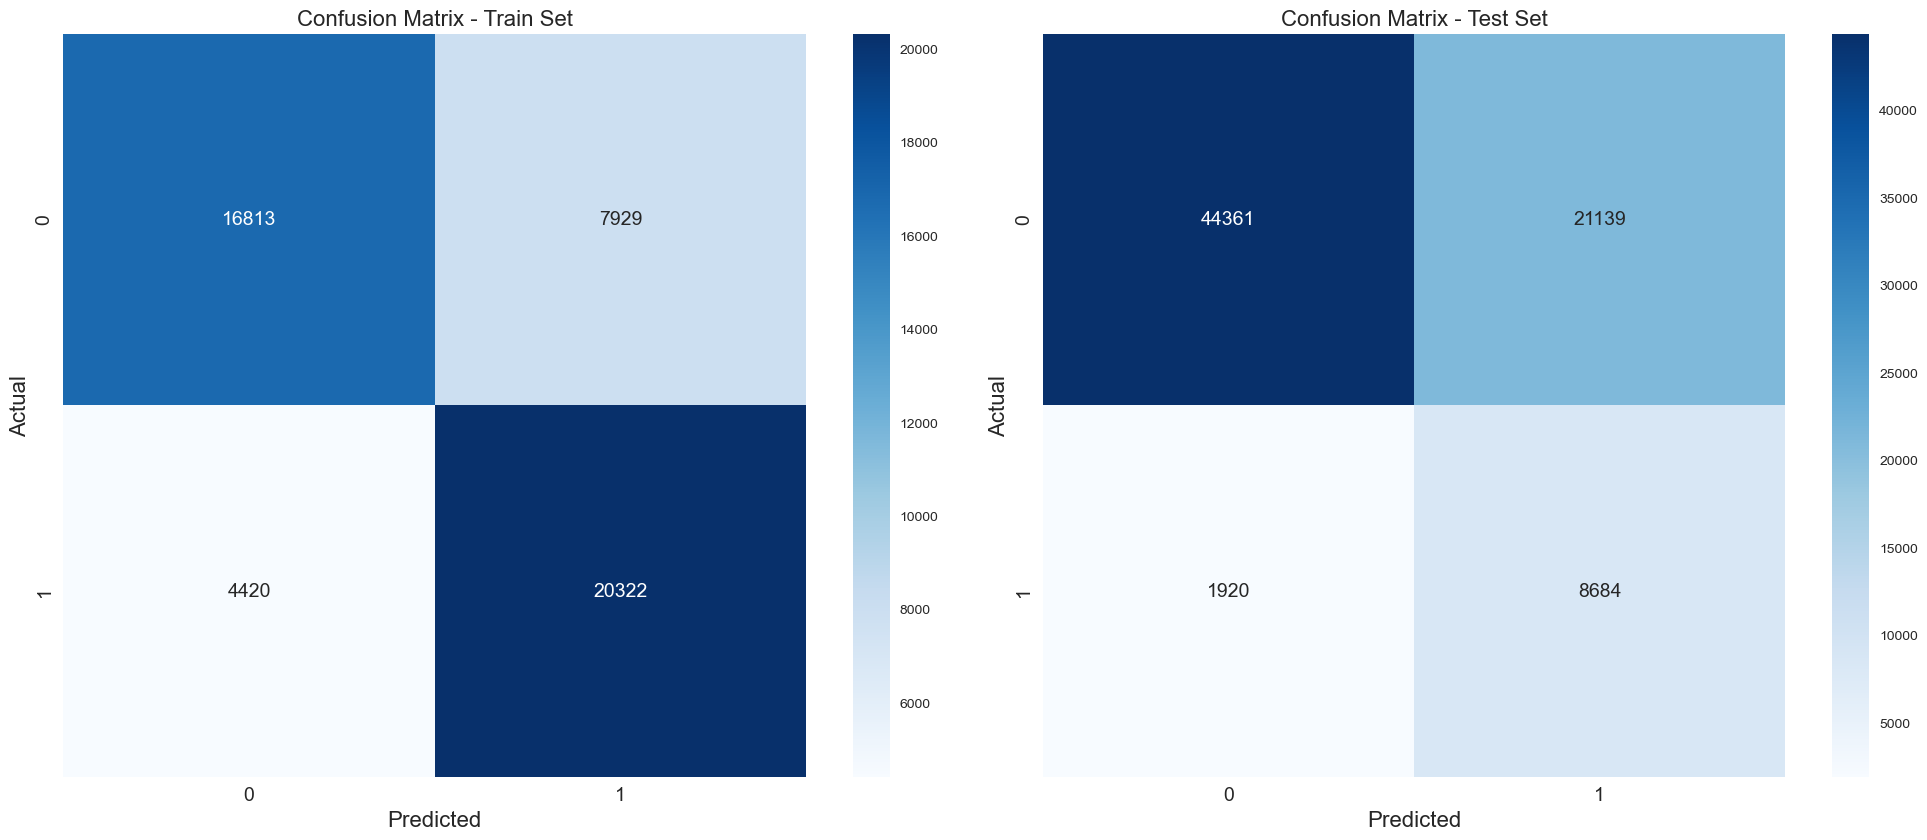

In [47]:
# Generate classification report
print("Classification Report - Train Set:")
print(classification_report(y_resample, y_pred_train))
print("\nClassification Report - Test Set:")
print(classification_report(y_test, y_pred_test))

# Generate confusion matrices
cm_train = confusion_matrix(y_resample, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Visualize confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax1, cbar=True, square=True, annot_kws={"size": 14})
ax1.set_title('Confusion Matrix - Train Set', fontsize=16)
ax1.set_xlabel('Predicted', fontsize=16)
ax1.set_ylabel('Actual', fontsize=16)
ax1.tick_params(labelsize=14)

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax2, cbar=True, square=True, annot_kws={"size": 14})
ax2.set_title('Confusion Matrix - Test Set', fontsize=16)
ax2.set_xlabel('Predicted', fontsize=16)
ax2.set_ylabel('Actual', fontsize=16)
ax2.tick_params(labelsize=14)

plt.tight_layout()
plt.show()


Based on the output above, we can see that :  

1. **Training Data**:

- `True Negatives (TN)`: 16,813 observations were correctly predicted as no diabetes.
- `False Positives (FP)`: 7,929 observations were incorrectly predicted as diabetes.
- `False Negatives (FN)`: 4,420 observations were incorrectly predicted as no diabetes.
- `True Positives (TP)`: 20,322 observations were correctly predicted as diabetes.

2. **Testing Data**:

- `True Negatives (TN)`: 44,361 observations were correctly predicted as no diabetes.
- `False Positives (FP)`: 21,139 observations were incorrectly predicted as diabetes.
- `False Negatives (FN)`: 1,920 observations were incorrectly predicted as no diabetes.
- `True Positives (TP)`: 8,684 observations were correctly predicted as diabetes.


The model's performance regarding **false negatives** reveals critical insights about its ability to accurately detect diabetes cases. In the **training data**, `4,420` cases of diabetes were incorrectly classified as non-diabetic. This **high number** of false negatives indicates a **significant risk** of **underdiagnosis** and suggests that the model needs **further refinement** to improve its ability to detect true diabetes cases.

**Encouragingly**, when examining the **test data**, we observe a **notable improvement**. Only `1,920` diabetes cases were misclassified as non-diabetic, which is **less than half** the number of false negatives in the training set. This **substantial reduction** in false negatives for **unseen data** is a **positive indicator** of the model's **generalization capabilities**. It suggests that the model is **performing better** on new, real-world data, which is **crucial** for its practical application.

While there is still room for improvement, this **significant decrease** in false negatives from training to test data is **promising**. It indicates that the model is **less likely** to miss actual diabetes cases when deployed in real-world scenarios. This **improvement** is **vital** for **patient safety**, as it means more individuals with diabetes are likely to be **correctly identified** and receive **timely treatment**.

The **importance** of this **reduction** in false negatives cannot be overstated. It translates to **potentially saving lives** through **earlier detection** and intervention. Moreover, this improvement builds **confidence** in the model's predictions among healthcare professionals, which is **essential** for its **adoption** and **effective use** in clinical settings. While we should continue to strive for even fewer false negatives, this progress from training to test data is a **significant step** in the right direction for **reliable diabetes detection**.


In [48]:
# Compare model performance for the original model

# Calculate metrics for the original model
train_recall_original = recall_score(y_resample, y_pred_train)
test_recall_original = recall_score(y_test, y_pred_test)
train_fn_original = confusion_matrix(y_resample, y_pred_train)[1][0]
test_fn_original = confusion_matrix(y_test, y_pred_test)[1][0]

# Create a comparison dataframe
model_without_tuning_df = pd.DataFrame({
    'Metric': ['Train Recall', 'Test Recall', 'Train False Negatives', 'Test False Negatives'],
    'Original Model': [f'{train_recall_original:.2f}', f'{test_recall_original:.2f}', f'{train_fn_original}', f'{test_fn_original}']
})


In [49]:
# Display the DataFrame containing performance metrics for the original model without tuning
model_without_tuning_df

,Metric,Original Model
0,Train Recall,0.82
1,Test Recall,0.82
2,Train False Negatives,4420
3,Test False Negatives,1920


The output above reveal the summary of our model :

The table presents the performance report of the **SVM model** without tuning. The model shows **strong recall rates** of `0.82` for both training and testing data, indicating a good ability to identify positive cases and minimize the *False Negative*. This means our model is **`"GOOD FIT"`**.

The model's performance on **false negatives** is particularly interesting. In the training data, there are `4420` false negatives, which reduces to `1920` in the test data. This **significant reduction** in false negatives from training to test data is **encouraging**, as it suggests the model may perform better on unseen data in real-world scenarios.

Overall, while the model shows promise, especially in its recall and reduction of false negatives in test data, there is room for improvement. Therefore, we will do hyperparameter tuning next.

### VIII.II Best Model with Hyperparameter Tuning

While our SVM model demonstrates promising performance, there's still room for enhancement. To achieve this, we'll employ **hyperparameter tuning** to optimize our SVM model further and potentially yield even better results.

Hyperparameter tuning is a crucial step in refining model performance. It involves finding the optimal values for predefined parameters. We'll use GridSearchCV, a methodical approach that systematically searches through a grid of hyperparameters to identify the best combination. This technique incorporates cross-validation to evaluate each parameter set thoroughly. Once we determine the best parameters, we can make predictions using our optimized SVM model.

In our tuning process, we'll focus on several key parameters, each chosen for specific reasons:

- **`C`**: This parameter controls the trade-off between achieving a low training error and a low testing error. It defines the SVM's margin of tolerance for misclassifications. A smaller C creates a wider margin but allows more errors, while a larger C aims for a smaller margin with fewer errors.

- **`kernel`**: This determines the type of hyperplane used to separate the classes. Different kernels (e.g., linear, polynomial, rbf) allow the SVM to create various types of decision boundaries, potentially capturing more complex relationships in the data.

- **`class_weight`**: This parameter addresses class imbalance during training. By assigning higher weights to the minority class (in our case, individuals with diabetes), we can improve the model's ability to correctly identify these critical cases.

By fine-tuning these parameters, we aim to enhance our SVM model's ability to accurately predict diabetes outcomes, potentially improving its performance on both majority and minority classes.

In [50]:
# Set up the parameter grid for SVM
param_grid_svm = {
    'classifier__C': [1, 0.1, 10],  # 1 is the default
    'classifier__kernel': ['rbf', 'linear'],  # 'rbf' is the default
    'classifier__class_weight': [None, 'balanced']  # None is the default
}

# Set up the GridSearchCV object for SVM
grid_search_svm = GridSearchCV(pipe_svc,
                               param_grid=param_grid_svm,
                               scoring='recall',
                               cv=stratified_cv,
                               verbose=1,
                               n_jobs=-1)

# Fit GridSearchCV for SVM
grid_search_svm.fit(X_resample, y_resample)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['BMI',
                                                                          'MentHlth',
                                                                          'PhysHlth']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse=False),
                                                                         ['Sex'])])),
                                       ('classifier', SVC(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': [1, 0.1, 10],
                         'classifier__class_weight': [None, 'balanced'],
                         'classifier__kernel': ['rbf', 'linear']},
             scoring='recall', verbose=1)

In [51]:
# Best hyperparameters for SVM and recall for SVM
print('Best hyperparameters for SVM:', grid_search_svm.best_params_)
print('Best recall for SVM:', f'{grid_search_svm.best_score_:.2f}')

Best hyperparameters for SVM: {'classifier__C': 10, 'classifier__class_weight': 'balanced', 'classifier__kernel': 'rbf'}
Best recall for SVM: 0.82


Looking at the output above, we can see that we achieved a similar recall score of 0.82 both before and after tuning the hyperparameters. This consistency in performance could be due to several reasons:

1. **Initial model optimization**: Our original model may have already been well-optimized for the dataset, leaving little room for improvement through hyperparameter tuning.

2. **Dataset characteristics**: The nature of our dataset might be such that it doesn't benefit significantly from more complex decision boundaries or different kernel functions.

3. **Limited hyperparameter space**: The range of hyperparameters we explored in our grid search might not have been wide enough to find a significantly better configuration.

4. **Model stability**: SVM models can be relatively stable across different hyperparameter settings, especially if the data is well-separated.

5. **Inherent limitations**: There might be an inherent limit to the predictive power of the features we're using, which additional tuning cannot overcome.

While we didn't see an improvement in recall, it's important to note that maintaining the same high level of performance after tuning is still a positive outcome. It suggests that our model is robust and performs consistently across different configurations. Also, maybe there could be an increase in train or test set after tuning (other than validaiton set) that we will check further now.

Therefore, we will assign the best estimator found on grid search as our tuned model. We will use the SVM model with the following hyperparameters:

- **`C`**: 10
- **`class_weight`**: 'balanced'
- **`kernel`**: 'rbf'

These hyperparameters were determined to be optimal through our grid search process, balancing the model's ability to handle class imbalance while maintaining a good fit to the data. So, we will assign a variable with this model with the hyperparameters mentioned to save it later.

In [52]:
# Save best SVM model to a variable
tuned_model = grid_search_svm.best_estimator_

Next, we will see the performance of the tuned_model in training vs testing as follows

In [53]:
# Get predictions for training and testing set using the hyperparameter tuned model
y_pred_train_tuned = tuned_model.predict(X_resample)
y_pred_test_tuned = tuned_model.predict(X_test)

In [54]:
# Print recall score
print('Recall Score - Train Set after tuning: {:.2f}'.format(recall_score(y_resample, y_pred_train_tuned)))
print('Recall Score - Test Set after tuning : {:.2f}'.format(recall_score(y_test, y_pred_test_tuned)))

Recall Score - Train Set after tuning: 0.83
Recall Score - Test Set after tuning : 0.82


We can see that after we tuned our model, the Recall scores for the SVM model on both the train and test sets still demonstrate **consistent performance**, `also there is 1% increase in train set`, indicating its **effectiveness** in predicting diabetes cases. A Recall score of `0.83` on the train set and `0.82` on the test sets implies that the model successfully identified a **significant proportion** of true diabetes cases among all actual diabetes cases. This consistency between train and test performance suggests that the model **generalizes well** to unseen data and can be seen as a **`"GOOD FIT"`** model.

The Recall score of `0.82` is particularly **important** in healthcare applications where the focus is on **minimizing False Negatives**, ensuring that individuals at risk of diabetes are **correctly identified** and provided with appropriate care and intervention. While there is still room for improvement, this performance indicates that the SVM model is **reasonably effective** in predicting diabetes outcomes, capturing a **minority** of the positive cases.

Overall, the SVM model after tuning also shows **promising and consistent performance** across both training and test datasets, which is a **good indicator** of its **reliability** in predicting diabetes outcome.

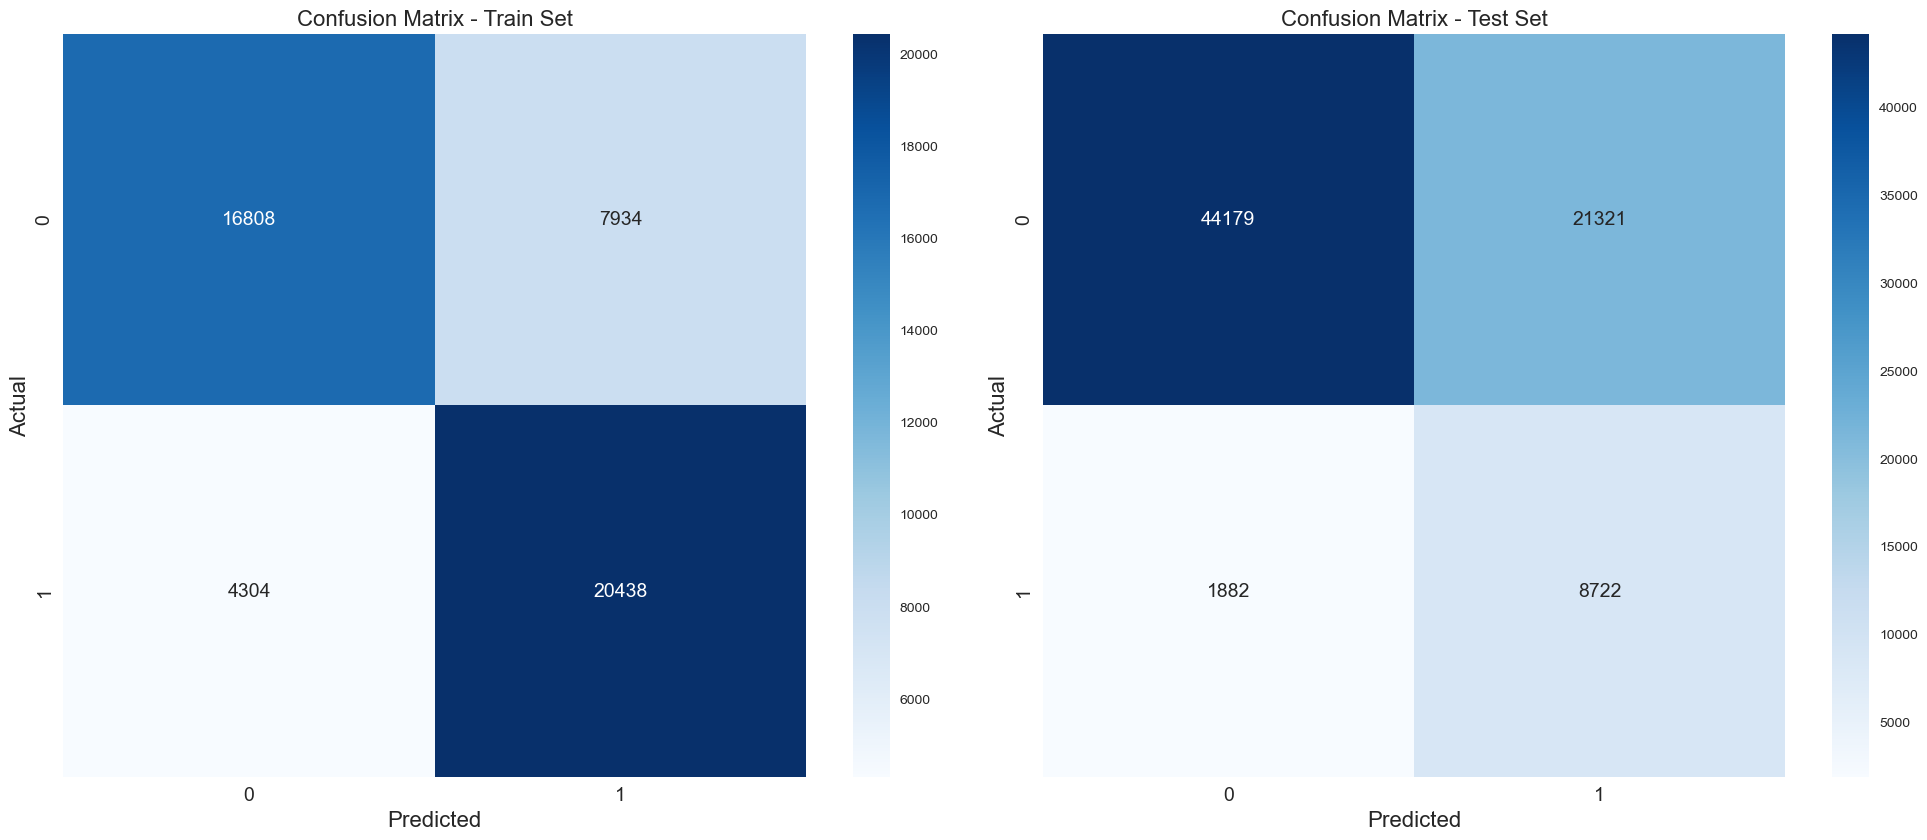

In [55]:
# Generate confusion matrices
cm_train = confusion_matrix(y_resample, tuned_model.predict(X_resample))
cm_test = confusion_matrix(y_test, tuned_model.predict(X_test))

# Visualize confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax1, cbar=True, square=True, annot_kws={"size": 14})
ax1.set_title('Confusion Matrix - Train Set', fontsize=16)
ax1.set_xlabel('Predicted', fontsize=16)
ax1.set_ylabel('Actual', fontsize=16)
ax1.tick_params(labelsize=14)

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax2, cbar=True, square=True, annot_kws={"size": 14})
ax2.set_title('Confusion Matrix - Test Set', fontsize=16)
ax2.set_xlabel('Predicted', fontsize=16)
ax2.set_ylabel('Actual', fontsize=16)
ax2.tick_params(labelsize=14)

plt.tight_layout()
plt.show()

Based on the output above, we can see that after we tuned our model, we achieve this performance :  

1. **Training Data**:

- `True Negatives (TN)`: 16,808 observations were correctly predicted as no diabetes.
- `False Positives (FP)`: 7,934 observations were incorrectly predicted as diabetes.
- `False Negatives (FN)`: 4,304 observations were incorrectly predicted as no diabetes.
- `True Positives (TP)`: 20,438 observations were correctly predicted as diabetes.

2. **Testing Data**:

- `True Negatives (TN)`: 44,179 observations were correctly predicted as no diabetes.
- `False Positives (FP)`: 21,321 observations were incorrectly predicted as diabetes.
- `False Negatives (FN)`: 1,882 observations were incorrectly predicted as no diabetes.
- `True Positives (TP)`: 8,722 observations were correctly predicted as diabetes.


The **confusion matrix** offers **valuable insights**, revealing that the **tuned model** has **markedly improved** its **capability** to **reduce false negatives**. This **enhancement** in **minimizing false negatives** translates to a **lower likelihood** of **overlooking actual diabetes cases**, thereby **increasing the model's reliability** in **identifying individuals with the condition**.

In [56]:
# Compare model performance before and after tuning

# Calculate metrics for the original model
train_recall_original = recall_score(y_resample, y_pred_train)
test_recall_original = recall_score(y_test, y_pred_test)
train_fn_original = confusion_matrix(y_resample, y_pred_train)[1][0]
test_fn_original = confusion_matrix(y_test, y_pred_test)[1][0]

# Calculate metrics for the tuned model
train_recall_tuned = recall_score(y_resample, y_pred_train_tuned)
test_recall_tuned = recall_score(y_test, y_pred_test_tuned)
train_fn_tuned = confusion_matrix(y_resample, y_pred_train_tuned)[1][0]
test_fn_tuned = confusion_matrix(y_test, y_pred_test_tuned)[1][0]

# Create a comparison dataframe
comparison_df = pd.DataFrame({
    'Metric': ['Train Recall', 'Test Recall', 'Train False Negatives', 'Test False Negatives'],
    'Original Model': [f'{train_recall_original:.2f}', f'{test_recall_original:.2f}', f'{train_fn_original}', f'{test_fn_original}'],
    'Tuned Model': [f'{train_recall_tuned:.2f}', f'{test_recall_tuned:.2f}', f'{train_fn_tuned}', f'{test_fn_tuned}']
})


Next up, we can see the comparison performance of our model between original model (before tuning) vs tuned model (after tuning)

In [57]:
# Show the comparison of original model (before tuning) vs tuned model (after tuning)
comparison_df

,Metric,Original Model,Tuned Model
0,Train Recall,0.82,0.83
1,Test Recall,0.82,0.82
2,Train False Negatives,4420,4304
3,Test False Negatives,1920,1882


The **comparison** between the **original SVM model** and the **tuned version** reveals **subtle yet significant enhancements** in **performance**. After tuning, we observe a **slight increase** in **recall** for the **training set** (from `82%` to `83%`), while the **test set recall remains constant**. This suggests an **improved ability** to **detect true positive cases** and **minimize false negatives**. Furthermore, the **tuning process** led to a **reduction in false negatives**: from `4420` to `4304`, which is a reduction of 116 in the **training set**, and from `1920` to `1882`, which is a reduction of 38 in the **test set**. These **improvements** indicate that the **tuned model** has become **more adept** at **accurately identifying diabetes cases**, demonstrating the **effectiveness** of the **optimization process**.


For a **more comprehensive analysis** of our model, we will proceed to the `Conclusion & Analysis` section. There, we will **examine in depth** the **advantages and disadvantages** of our model, explore its **business implications**, and discuss its potential **impact on diabetes diagnosis**. This analysis will provide a **holistic view** of our model's performance and its practical applications, offering valuable insights for healthcare professionals involved in diabetes management and prevention strategies.

## IX. Model Saving


The optimized model, along with its associated Pipeline components, is preserved in a `.pkl` file following the tuning process. This approach ensures that all essential elements, including preprocessing steps and the refined model, are consolidated into a single, easily accessible file.

Therefore, we will have:
- **File format**: `.pkl` (pickle) file
- **Contents**: Entire Pipeline, including:
  - Preprocessing steps
  - Tuned model parameters
- **Advantages**: 
  - Simplifies storage and retrieval
  - Maintains consistency between training and deployment

In [58]:
# Save the tuned model
with open('tuned_model.pkl', 'wb') as model_file:
    pickle.dump(tuned_model, model_file)

print("Tuned model has been saved as 'tuned_model.pkl'")

Tuned model has been saved as 'tuned_model.pkl'


## X. Model Inference


This section will be performed in a separate file named **`P1M2_Ayudha_Amari_inference.ipynb`**.

## XI. Conceptual Problems

### `- Bagging`

Bagging was introduced by Leo Breiman in 1996 as a method to improve the stability and accuracy of machine learning algorithms, particularly decision trees

Bagging was developed to address the **high variance** problem in machine learning models, especially **decision trees**. These models often suffer from **overfitting**, where they perform well on training data but poorly on unseen data. Breiman developed bagging to address the **sensitivity** of certain algorithms, particularly decision trees, to minor changes in training data. He observed that even small alterations, like adding or removing a single data point, could lead to substantially different models. To mitigate this **instability**, Breiman proposed bagging as a technique to **reduce model variance**. The method involves creating **multiple training subsets**, building a model on each, and **aggregating** their predictions to produce a more **robust** and **consistent** outcome.

Bagging, short for **Bootstrap Aggregating**, is an ensemble learning technique in machine learning that aims to improve the stability and accuracy of models, particularly decision trees. Bagging creates multiple subsets of the original training data using random sampling with replacement (bootstrap sampling). It then trains a separate model on each subset and combines their predictions through voting or averaging.

<center>
<img src="./images/rf.png" alt="Bagging" width="500">

Implementation Steps of Bagging

- Step 1: Multiple subsets are created from the original data set with equal tuples, selecting observations with replacement.
- Step 2: A base model is created on each of these subsets.
- Step 3: Each model is learned in parallel with each training set and independent of each other.
- Step 4: The final predictions are determined by combining the predictions from all the models.

The Random Forest algorithm is a popular implementation of bagging, using decision trees as base models. Bagging is a powerful technique that can significantly improve model performance, especially when dealing with high-variance models or limited data. Its ability to reduce overfitting and increase model stability makes it a valuable tool in many machine learning applications.

[Reference 1](https://www.geeksforgeeks.org/bagging-vs-boosting-in-machine-learning/)   
[Reference 2](https://towardsdatascience.com/understanding-bootstrap-aggregating-bagging-53724b702a7a)   
[Reference 3](https://machinelearningmastery.com/bagging-and-random-forest-ensemble-algorithms-for-machine-learning/)   

### `- Random Forest vs XGBoost`

`Random Forest`

A **Random Forest** is composed of a **collection of decision trees**, each trained on a **subset of the original features**. The underlying principle is that while **individual trees** may be **weak learners** due to their limited exposure to data, the **collective forest** can produce **accurate results** and effectively **handle high variance**. This **ensemble modeling approach** is also referred to as **Bagging**.

<center>
<img src="./images/bagging.jpg" alt="Bagging" width="700">

In short, random Forest algorithm works as follows :
- Uses a bagging approach, training multiple decision trees in parallel
- Each tree is trained on a random subset of the data and features
- The final prediction is determined by a majority vote or average of all the individual trees
- Trees are independent of each other

`XGBoost`

While **Bagging** algorithms train decision trees in **parallel**, **Boosting** algorithms take a **serial approach**. Each model in the series **trains upon its predecessor's mistakes**, trying to **correct** them. The final model is a **collection of weak learners** trained on the **residue of strong learners** to form the final prediction.

<center>
<img src="./images/boosting.jpg" alt="Bagging" width="700">

In short, XGBoost algorithm works as follows :
- Uses a boosting approach, training decision trees sequentially
- Each subsequent tree is trained to correct the errors of the previous trees
- The final prediction is a weighted sum of all the trees' predictions
- Trees are dependent on each other, with each new tree learning from the mistakes of the previous ones
- Uses advanced regularization techniques to prevent overfitting
- Employs a more sophisticated method of tree pruning based on the node's similarity score

Notes : The XGBoosting algorithm uses advanced regularization techniques to suppress weights, prevent overfitting, and enhance its performance in real-world scenarios. On top of this, the implementation allows the algorithm to cache data and utilize multiple CPU cores for speedy processing. The enhanced performance and speed have made XGBoost one of the most popular machine-learning algorithms in recent years.

In summary, even tho both algorithms use **decision trees** as their base learners, **Random Forest** creates a "forest" of **independent trees** trained in **parallel**, while **XGBoost** builds trees **sequentially**, with each new tree focusing on **correcting the errors** of the previous ones. This **sequential learning** in XGBoost often leads to **better performance**, especially on **complex datasets**, but at the cost of **increased complexity** in tuning and implementation.

[Reference 1](https://www.qwak.com/post/xgboost-versus-random-forest)

### `- Cross Validation`

<center>
<img src="./images/crossval.jpg" alt="Bagging" width="700">

Cross-validation is a model assessment technique used to evaluate how well a machine learning algorithm performs in predicting outcomes for new, unseen data. It involves partitioning the available dataset into subsets, using some for training and others for testing the model's performance.

The key aspects of cross-validation are:
- **Data partitioning**: The dataset is divided into training and testing subsets multiple times.
- **Iterative process**: The model is trained and tested on different data partitions in multiple rounds.
- **Performance averaging**: Results from each validation round are combined (usually averaged) to provide a more robust estimate of the model's predictive performance.

The main purposes of cross-validation include:
- Assessing how well a model **generalizes** to independent datasets.
- **Detecting and preventing overfitting** or selection bias.
- Providing insights into how the model might perform on **real-world data**.

Common cross-validation techniques include:
- **k-fold cross-validation**: Data is partitioned into k subsets, with each subset serving as a validation set once.
- **Holdout method**: Data is split into two subsets for training and validation.
- **Leave-one-out cross-validation**: Each data point serves as a validation set once.

Cross-validation is **crucial** in machine learning as it helps in selecting the **best-performing model** and provides a more accurate estimate of a model's **predictive capabilities** on new data.

[Reference 1](https://www.mathworks.com/discovery/cross-validation.html)   
[Reference 2](https://www.geeksforgeeks.org/cross-validation-machine-learning/)   
[Reference 3](https://en.wikipedia.org/wiki/Cross-validation_(statistics))   

## XII. Analysis & Conclusion


### XII.I Analysis

`EDA Analysis`

- **Demographic Overview**: The analysis predominantly indicates that **older adults**, particularly those in the **55-64 and 65-69 age groups**, have the **highest prevalence of diabetes**. The majority of diabetic individuals are found in these age brackets, highlighting a **significant association between age and diabetes prevalence**.

- **Diabetes Prevalence Across Education Levels**: The data shows a **higher prevalence of diabetes** among individuals with **lower education levels**, specifically those who are high school graduates. This suggests that lower education levels might be linked to higher diabetes risk, possibly due to lifestyle factors or limited access to health information.

- **Lifestyle Factors Among Diabetics**: Among those diagnosed with diabetes, the most common lifestyle factor is **low vegetable consumption**, with **75.6% of diabetic individuals** reporting insufficient intake. **Physical inactivity** also shows a strong presence among diabetics, emphasizing the **importance of diet and exercise** in diabetes prevention.

- **Health Conditions Correlated with Diabetes**: **High blood pressure (hypertension)** is the most frequently reported health condition among diabetic individuals, with a significant portion of the diabetic population also suffering from this condition. **High cholesterol levels** also show a notable association, further indicating the role of **cardiovascular risk factors** in diabetes prevalence.

- **Income and Diabetes**: The data highlights that **lower-income groups**, particularly those earning between **$10k to $15k and less than $10k**, have the **highest proportion of diabetes cases**. This trend decreases as income increases, suggesting a **strong correlation between lower socioeconomic status and higher diabetes risk**.

- **BMI and Diabetes Correlation**: BMI shows a **clear correlation** with the likelihood of diabetes, with diabetic individuals having a **higher average BMI** compared to non-diabetic individuals. The data indicates that a significant portion of diabetic individuals fall into the **overweight and obese categories**, underscoring the **impact of obesity on diabetes risk**.

- **Mental Health and Diabetes**: The relationship between mental health and diabetes risk is evident, with diabetic individuals reporting **more days of poor mental health** on average compared to non-diabetics. This suggests that diabetes may contribute to or exacerbate mental health challenges, making **mental health support** an important aspect of diabetes management.

This analysis provides insights into the key **demographic, lifestyle, and health factors** associated with diabetes, based on the visual EDA we've done before.

`Model Analysis`

To better understand the **strengths and limitations** of our model, we will conduct a detailed analysis of its performance. We'll create new columns in our dataframe to categorize predictions:

- **False Negatives (FN)**: Cases where the model predicted no diabetes (0) but the actual outcome was diabetes (1)
- **False Positives (FP)**: Cases where the model predicted diabetes (1) but the actual outcome was no diabetes (0)
- **True Positives (TP)**: Cases where both the prediction and actual outcome were diabetes (1)
- **True Negatives (TN)**: Cases where both the prediction and actual outcome were no diabetes (0)

By adding these columns to our original dataframe, we can gain **valuable insights** into the model's performance across different scenarios. This analysis will help us **identify patterns** in misclassifications and correct predictions, ultimately providing a **comprehensive view** of our model's advantages and disadvantages.

In [59]:
# Create a temporary dataframe for analysis using only the test set
df_analysis = df_eda.iloc[X_test.index].copy()

# Add the predicted values beside the Diabetes_binary column
df_analysis.insert(df_analysis.columns.get_loc('Diabetes_binary') + 1, 'Predicted', y_pred_test_tuned)

# Create new columns for FN, FP, TP, TN
df_analysis['FN'] = ((y_pred_test_tuned == 0) & (y_test == 1)).astype(int)
df_analysis['FP'] = ((y_pred_test_tuned == 1) & (y_test == 0)).astype(int)
df_analysis['TP'] = ((y_pred_test_tuned == 1) & (y_test == 1)).astype(int)
df_analysis['TN'] = ((y_pred_test_tuned == 0) & (y_test == 0)).astype(int)

# Set pandas display options to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [60]:
# Display df for our analysis
df_analysis

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary,Predicted,age_group,Education_Level,Income_Range,FN,FP,TP,TN
204639,0,0,1,19,1,0,0,0,1,1,0,1,0,2,0,0,0,0,8,6,3,0,0,55-59,College graduate,15k to 20k,0,0,0,1
98977,0,1,1,26,1,0,0,1,1,1,0,1,0,1,0,0,0,0,10,4,8,0,0,65-69,High school Graduate,75k or more,0,0,0,1
119879,1,0,1,45,1,0,0,1,1,0,0,1,1,1,15,0,0,0,5,4,1,0,0,40-44,High school Graduate,Less than 10k,0,0,0,1
163390,0,0,1,22,1,0,0,1,0,1,0,1,0,1,0,0,0,0,10,6,7,0,0,65-69,College graduate,50k to 75k,0,0,0,1
139860,0,0,1,22,0,0,0,1,0,1,0,1,0,2,0,0,0,1,2,6,8,0,0,25-29,College graduate,75k or more,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19869,0,0,1,42,0,0,0,1,1,1,0,1,0,2,0,0,0,0,5,5,7,0,0,40-44,College,50k to 75k,0,0,0,1
178391,1,0,1,26,0,0,0,1,0,1,0,1,0,2,0,2,0,0,10,6,7,1,0,65-69,College graduate,50k to 75k,1,0,0,0
35223,1,1,1,27,1,0,0,1,1,1,0,1,0,2,0,0,0,0,12,5,6,1,1,75-79,College,35k to 50k,0,0,1,0
7924,0,0,1,25,0,0,0,1,0,1,0,1,1,3,0,0,0,1,8,4,1,0,0,55-59,High school Graduate,Less than 10k,0,0,0,1


Using dataframe above, we can derived the **disadvantage** of our model as follows :

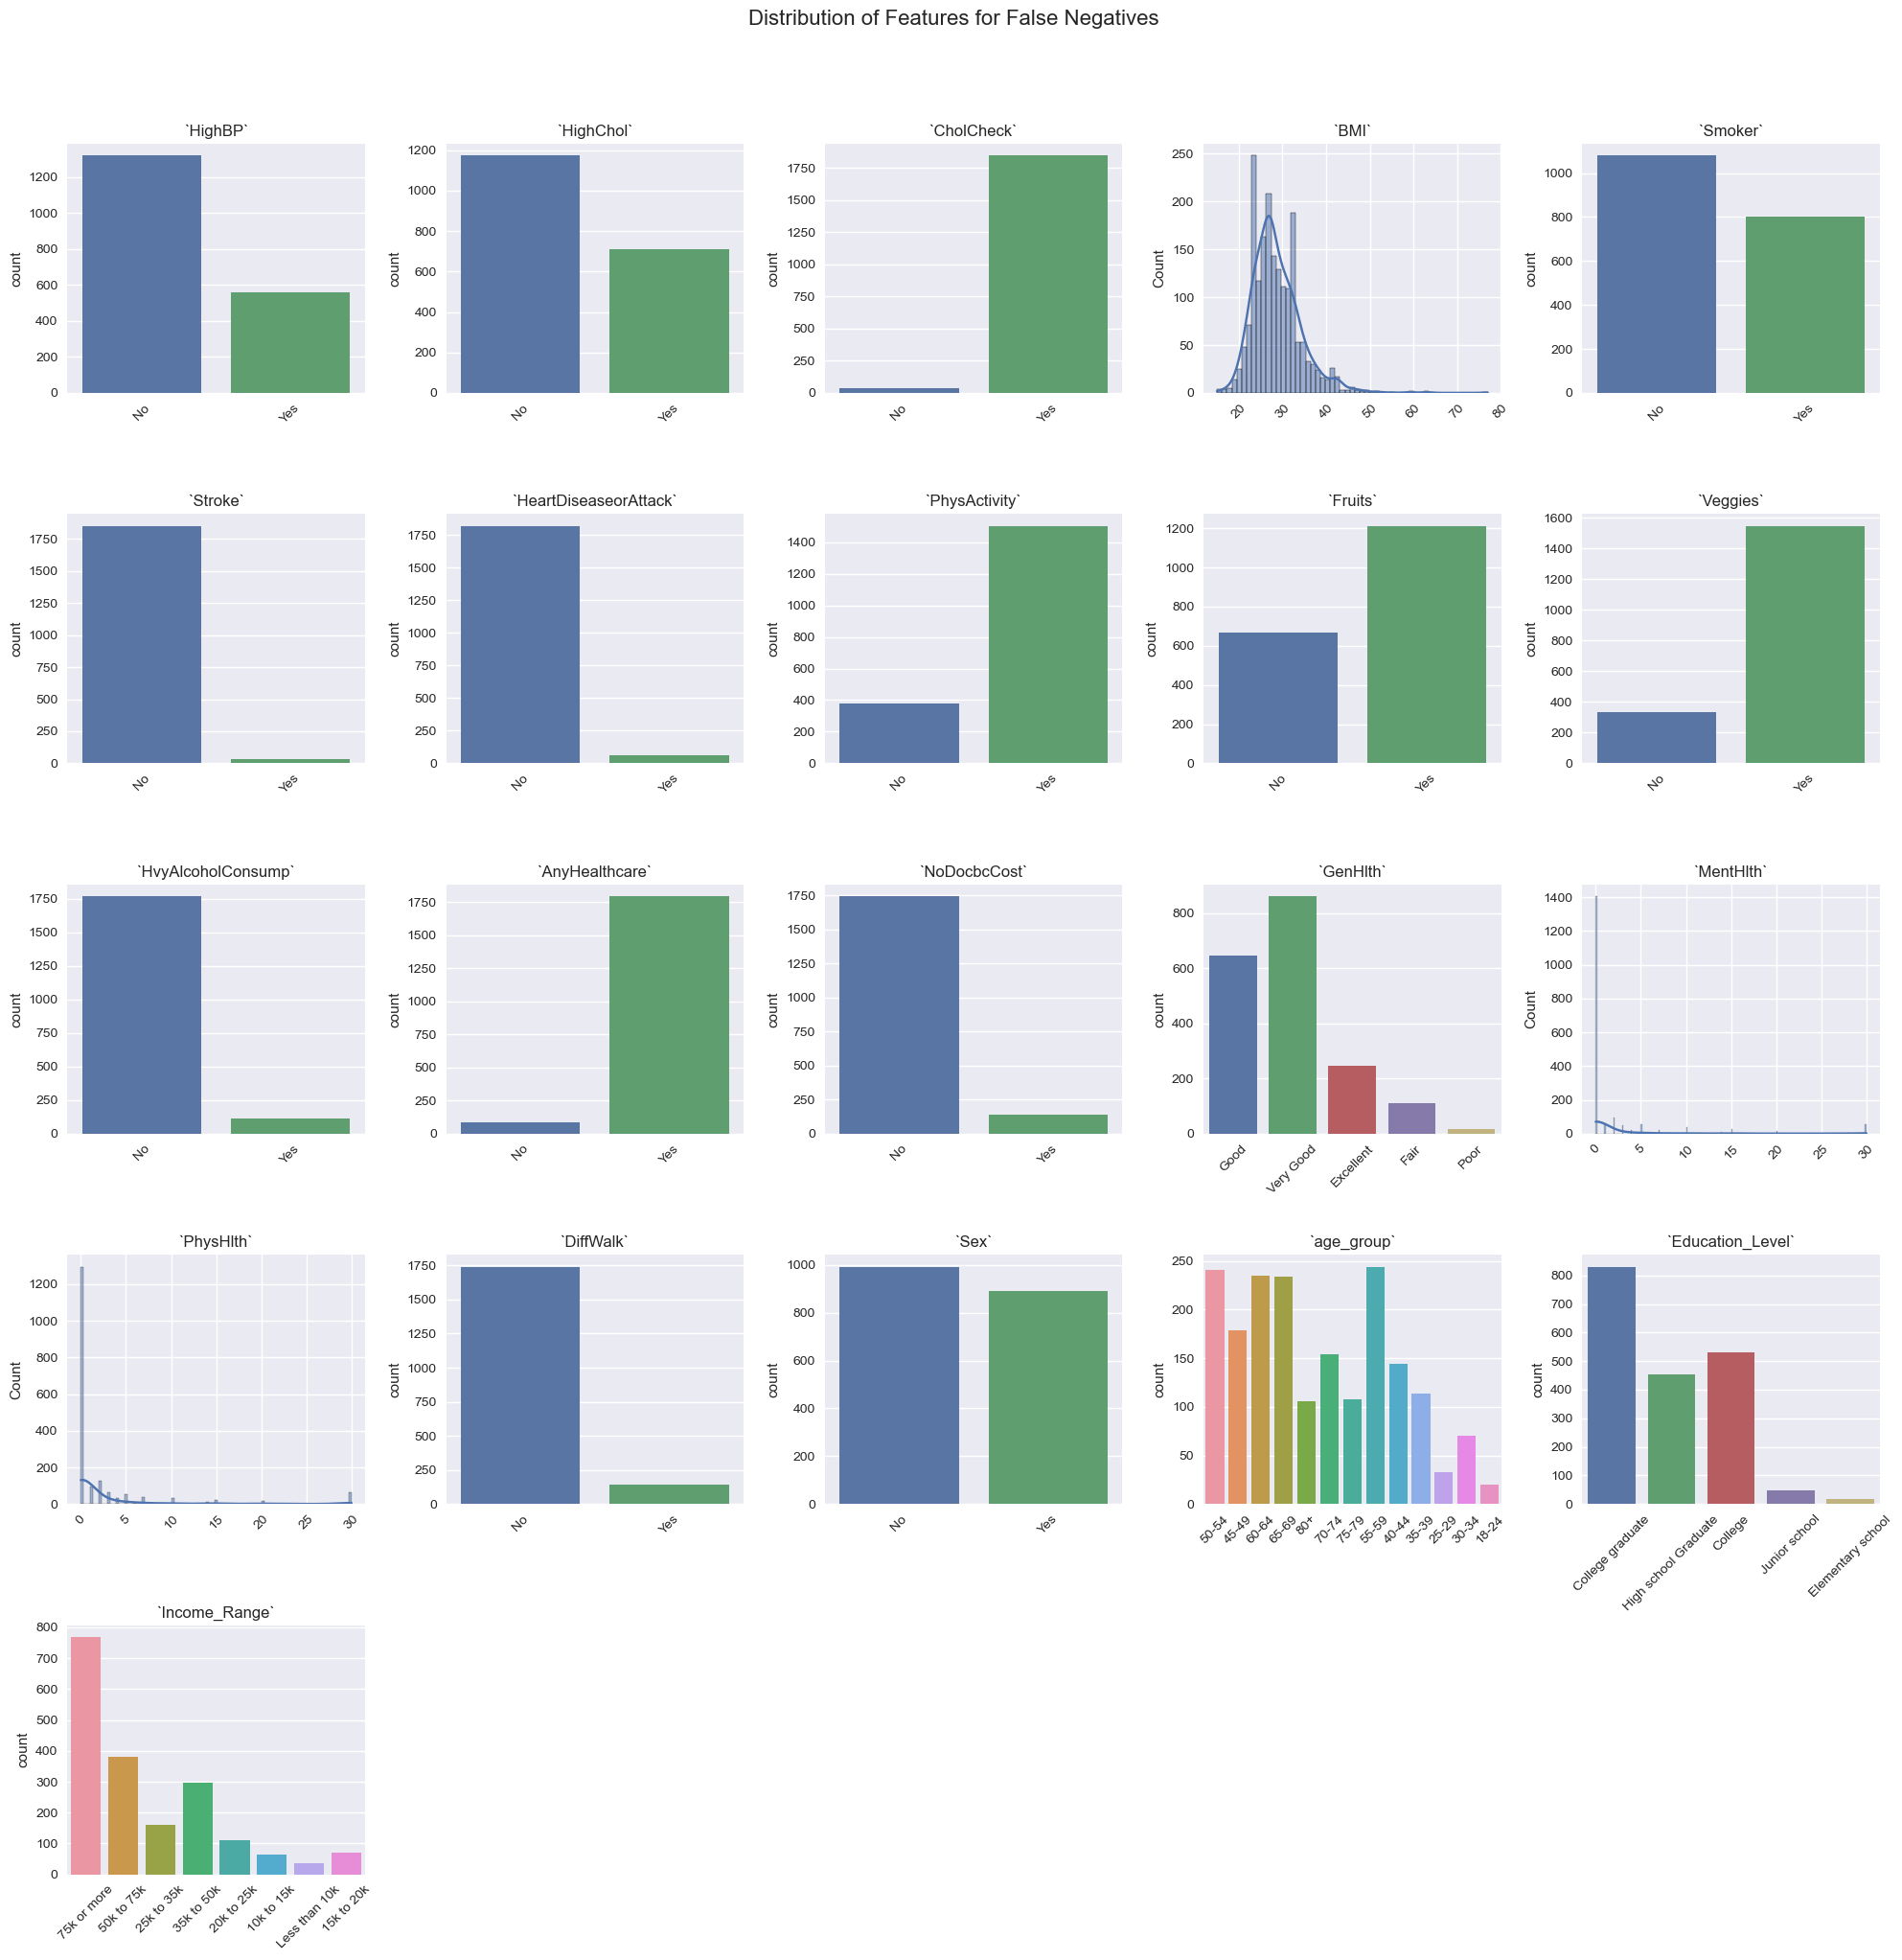

Analysis of False Negatives:

Numerical Features:
- `BMI`: Mean = 28.73, Median = 28.00
- `MentHlth`: Mean = 2.26, Median = 0.00
- `PhysHlth`: Mean = 2.49, Median = 0.00

Categorical Features:
- `HighBP`: Most common value = 0 (70.14% of false negatives)
- `HighChol`: Most common value = 0 (62.33% of false negatives)
- `CholCheck`: Most common value = 1 (98.14% of false negatives)
- `Smoker`: Most common value = 0 (57.33% of false negatives)
- `Stroke`: Most common value = 0 (98.41% of false negatives)
- `HeartDiseaseorAttack`: Most common value = 0 (96.76% of false negatives)
- `PhysActivity`: Most common value = 1 (79.86% of false negatives)
- `Fruits`: Most common value = 1 (64.40% of false negatives)
- `Veggies`: Most common value = 1 (82.20% of false negatives)
- `HvyAlcoholConsump`: Most common value = 0 (93.94% of false negatives)
- `AnyHealthcare`: Most common value = 1 (95.38% of false negatives)
- `NoDocbcCost`: Most common value = 0 (92.61% of false negatives)
- `GenHlth`: M

In [61]:
# Analyze characteristics of false negatives
df_false_negatives = df_analysis[df_analysis['FN'] == 1].drop(['Predicted', 'Age', 'Education', 'Income', 'Diabetes_binary', 'FP', 'TP', 'TN', 'FN'], axis=1)

# Define numerical and categorical columns
numerical_columns = ['BMI', 'MentHlth', 'PhysHlth']
categorical_columns = [col for col in df_false_negatives.columns if df_false_negatives[col].dtype == 'object']

# Map GenHlth to categorical values
df_false_negatives['GenHlth'] = df_false_negatives['GenHlth'].map({1: 'Excellent', 2: 'Very Good', 3: 'Good', 4: 'Fair', 5: 'Poor'})

# Calculate the number of subplots needed
n_cols = len(df_false_negatives.columns)
n_rows = (n_cols + 4) // 5  # Round up to the nearest multiple of 5

# Set up the plot
fig, axs = plt.subplots(n_rows, 5, figsize=(20, 4*n_rows))
fig.suptitle("Distribution of Features for False Negatives", fontsize=16, y=1.02)
axs = axs.ravel()

# Plot histograms for numerical features and bar plots for categorical features
for i, col in enumerate(df_false_negatives.columns):
    if col in numerical_columns:
        sns.histplot(data=df_false_negatives, x=col, ax=axs[i], kde=True)
    else:
        sns.countplot(data=df_false_negatives, x=col, ax=axs[i])
    
    axs[i].set_title(f"`{col}`")
    axs[i].set_xlabel("")
    axs[i].tick_params(axis='x', rotation=45)
    
    # Replace 0 and 1 with 'No' and 'Yes' for binary features
    if df_false_negatives[col].nunique() == 2 and col not in categorical_columns:
        axs[i].set_xticklabels(['No', 'Yes'])

# Remove extra subplots
for i in range(len(df_false_negatives.columns), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the top margin
plt.show()

# Analyze the distribution of features for false negatives
print("Analysis of False Negatives:")
print("\nNumerical Features:")
for col in df_false_negatives.columns:
    if col in numerical_columns:
        mean_val = df_false_negatives[col].mean()
        median_val = df_false_negatives[col].median()
        print(f"- `{col}`: Mean = {mean_val:.2f}, Median = {median_val:.2f}")

print("\nCategorical Features:")
for col in df_false_negatives.columns:
    if col not in numerical_columns:
        mode_val = df_false_negatives[col].mode().values[0]
        mode_pct = (df_false_negatives[col] == mode_val).mean() * 100
        print(f"- `{col}`: Most common value = {mode_val} ({mode_pct:.2f}% of false negatives)")


Based on the output above, the model tends to **perform poorly** in predicting diabetes for individuals with:

Numerical Features:
- Higher `BMI` values
- Lower `MentHlth` values
- Lower `PhysHlth` values

Categorical Features:
- No **high blood pressure**
- No **high cholesterol**
- **Cholesterol check** performed
- Non-**smoker**
- No history of **stroke**
- No history of **heart disease or attack**
- Engages in **physical activity**
- Consumes **fruits**
- Consumes **vegetables**
- No **heavy alcohol consumption**
- Has **healthcare coverage**
- No **doctor visits due to cost**
- **General health** rated as Very Good
- No **difficulty walking**
- **Sex**: Female
- **Age group**: 55-59
- **Education level**: College graduate
- **Income range**: 75k or more

The analysis suggests that individual matching these characteristics may be at **risk** of having **undetected diabetes**, even when the model predicts a negative result. If an individual lifestyle's condition meets the mentioned criteria, there is a possibility that the person may have diabetes (testing positive) despite negative test results.

 Therefore, the **recommended business approach** is to `consult with a healthcare professional` for these individuals following the **machine learning prediction**. For individual whose lifestyle and health factors align with those where the model performs poorly, it is recommended to consult with a healthcare professional for further diabetes screening and testing, even if the machine learning model predicts a low risk of diabetes. This can help catch potential false negative predictions and ensure appropriate preventive care and interventions are provided.

Just like before, we can also derived our model's **advantage** by examining the non-false negative data as follows :

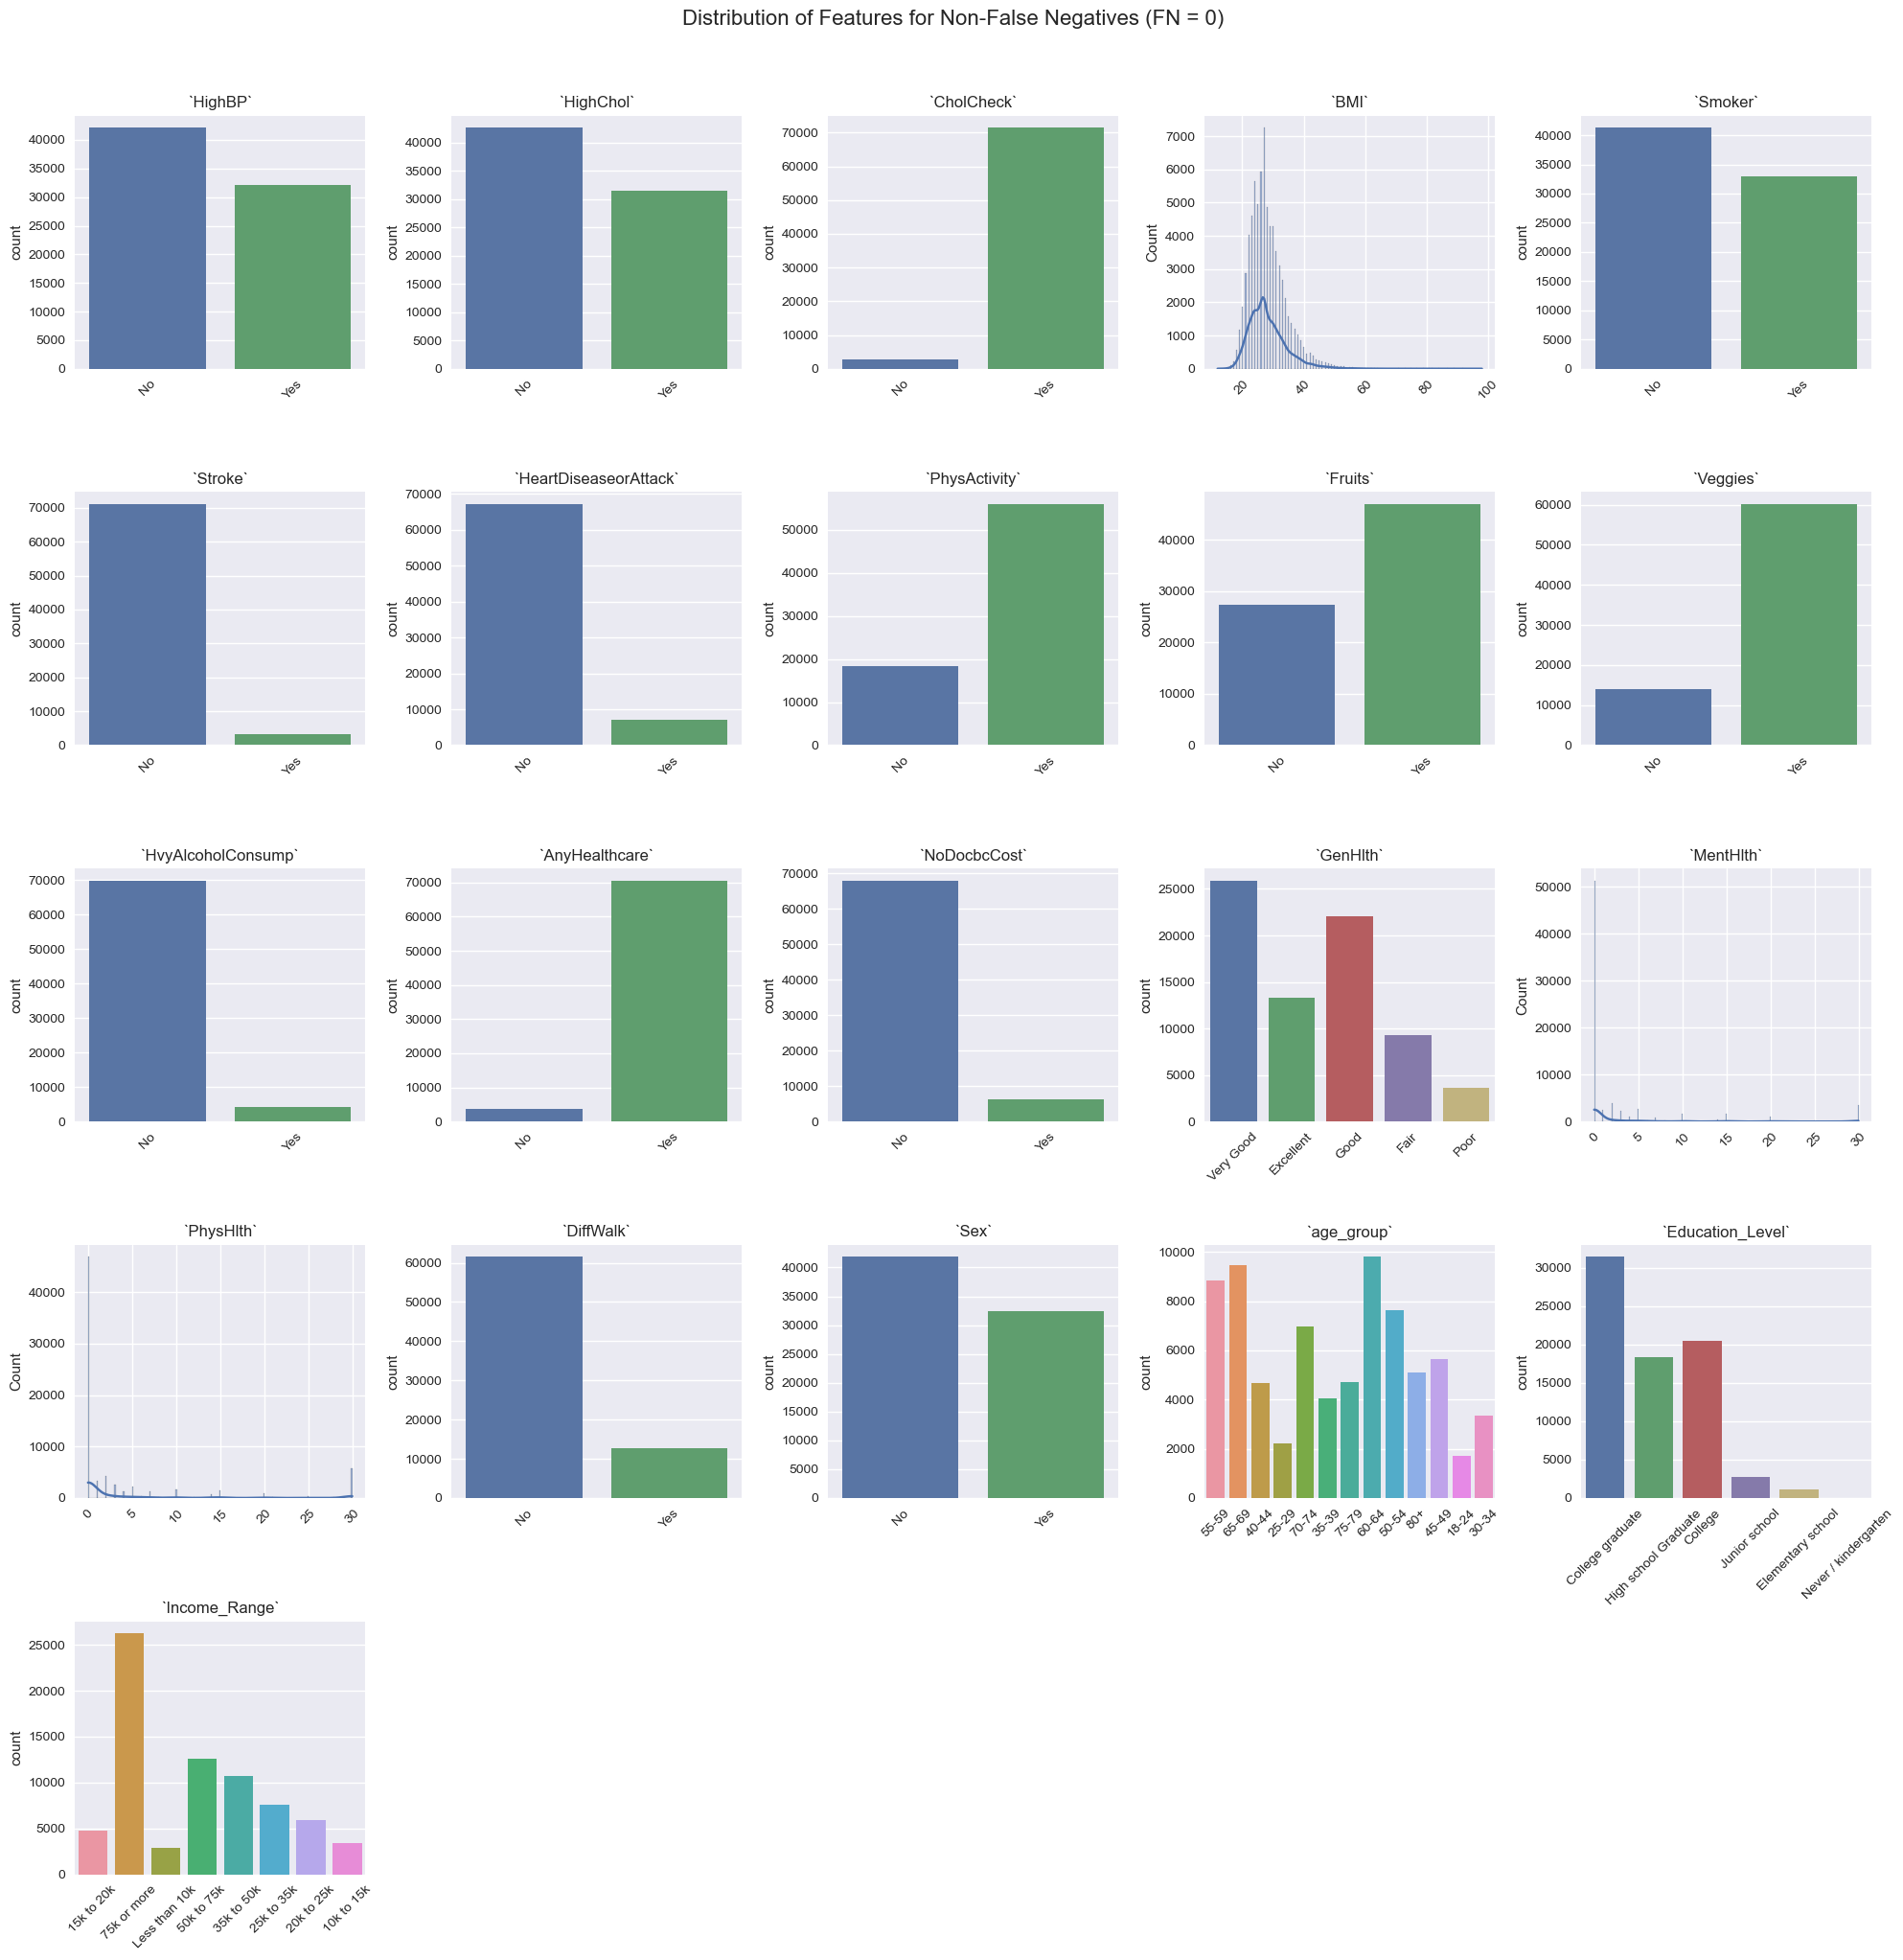

Analysis of Non-False Negatives (FN = 0):

Numerical Features:
- `BMI`: Mean = 28.39, Median = 27.00
- `MentHlth`: Mean = 3.19, Median = 0.00
- `PhysHlth`: Mean = 4.28, Median = 0.00

Categorical Features:
- `HighBP`: Most common value = 0 (56.79% of non-false negatives)
- `HighChol`: Most common value = 0 (57.51% of non-false negatives)
- `CholCheck`: Most common value = 1 (96.29% of non-false negatives)
- `Smoker`: Most common value = 0 (55.64% of non-false negatives)
- `Stroke`: Most common value = 0 (95.82% of non-false negatives)
- `HeartDiseaseorAttack`: Most common value = 0 (90.48% of non-false negatives)
- `PhysActivity`: Most common value = 1 (75.40% of non-false negatives)
- `Fruits`: Most common value = 1 (63.28% of non-false negatives)
- `Veggies`: Most common value = 1 (81.07% of non-false negatives)
- `HvyAlcoholConsump`: Most common value = 0 (94.21% of non-false negatives)
- `AnyHealthcare`: Most common value = 1 (95.14% of non-false negatives)
- `NoDocbcCost`: Most co

In [62]:
# Analyze characteristics of non-false negatives (FN = 0)
df_not_false_negatives = df_analysis[df_analysis['FN'] == 0].drop(['Predicted', 'Age', 'Education', 'Income', 'Diabetes_binary', 'FP', 'TP', 'TN', 'FN'], axis=1)

# Define numerical and categorical columns
numerical_columns = ['BMI', 'MentHlth', 'PhysHlth']
categorical_columns = [col for col in df_not_false_negatives.columns if df_not_false_negatives[col].dtype == 'object']

# Map GenHlth to categorical values
df_not_false_negatives['GenHlth'] = df_not_false_negatives['GenHlth'].map({1: 'Excellent', 2: 'Very Good', 3: 'Good', 4: 'Fair', 5: 'Poor'})

# Calculate the number of subplots needed
n_cols = len(df_not_false_negatives.columns)
n_rows = (n_cols + 4) // 5  # Round up to the nearest multiple of 5

# Set up the plot
fig, axs = plt.subplots(n_rows, 5, figsize=(20, 4*n_rows))
fig.suptitle("Distribution of Features for Non-False Negatives (FN = 0)", fontsize=16, y=1.02)
axs = axs.ravel()

# Plot histograms for numerical features and bar plots for categorical features
for i, col in enumerate(df_not_false_negatives.columns):
    if col in numerical_columns:
        sns.histplot(data=df_not_false_negatives, x=col, ax=axs[i], kde=True)
    else:
        sns.countplot(data=df_not_false_negatives, x=col, ax=axs[i])
    
    axs[i].set_title(f"`{col}`")
    axs[i].set_xlabel("")
    axs[i].tick_params(axis='x', rotation=45)
    
    # Replace 0 and 1 with 'No' and 'Yes' for binary features
    if df_not_false_negatives[col].nunique() == 2 and col not in categorical_columns:
        axs[i].set_xticklabels(['No', 'Yes'])

# Remove extra subplots
for i in range(len(df_not_false_negatives.columns), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

# Analyze the distribution of features for non-false negatives
print("Analysis of Non-False Negatives (FN = 0):")
print("\nNumerical Features:")
for col in numerical_columns:
    mean_val = df_not_false_negatives[col].mean()
    median_val = df_not_false_negatives[col].median()
    print(f"- `{col}`: Mean = {mean_val:.2f}, Median = {median_val:.2f}")

print("\nCategorical Features:")
for col in df_not_false_negatives.columns:
    if col not in numerical_columns:
        mode_val = df_not_false_negatives[col].mode().values[0]
        mode_pct = (df_not_false_negatives[col] == mode_val).mean() * 100
        print(f"- `{col}`: Most common value = {mode_val} ({mode_pct:.2f}% of non-false negatives)")


Conversely, the model tends to **perform well** in predicting for individuals with the following characteristics:

**Numerical Features:**
- Lower `BMI` values
- Higher `MentHlth` values
- Higher `PhysHlth` values

**Categorical Features:**
- No **high blood pressure**
- No **high cholesterol**
- **Cholesterol check** performed
- Non-**smoker**
- No history of **stroke**
- No history of **heart disease or attack**
- Engages in **physical activity**
- Consumes **fruits**
- Consumes **vegetables**
- No **heavy alcohol consumption**
- Has **healthcare coverage**
- No **doctor visits due to cost**
- **General health** rated as Very Good
- No **difficulty walking**
- **Sex**: Female
- **Age group**: 60-64
- **Education level**: College graduate
- **Income range**: 75k or more

Notably, individuals with these characteristics tend to have a **lower risk** of being **misclassified** as non-diabetic when they actually have diabetes (false negatives). This is because our model **performs well** in accurately identifying non-false negatives for people with these attributes. 

The model's **strong performance** in these cases suggests that:
1. These characteristics are **strongly associated** with a genuinely lower risk of diabetes.
2. The model has **learned meaningful patterns** related to these features.

Those are the **STRENGTH** and **WEAKNESS** of the model used whenever it performs on certain characteristics on individual.

Regardless, the **advantages** and **limitation** of our model from a technical aspect can be seen as follows:

Advantages:
- **Strong Performance**: The model achieves a **high recall** of `0.83` on the train and `0.82` on the test sets, indicating **good generalization**.
- **Consistency**: The similar performance on train and test sets suggests the model is **`GOOD-FIT`**.
- **Effective Classifier**: The SVM classifier **performs well** for this specific problem.
- **Improved Results**: Hyperparameter tuning led to a **slight improvement** in model performance.

Limitation:
- **Limited Hyperparameter Search**: The grid search was **restricted**, potentially missing optimal hyperparameter combinations.
- **Computational Intensity**: SVM can be **computationally expensive**, especially for large datasets, (it tooks around 20 minutes to tune with limited combination of hyperparameter here).
- **Interpretability**: SVM models can be **challenging to interpret**, making it difficult to explain predictions.
- **Feature Scaling Dependency**: SVMs are **sensitive to feature scaling**, requiring careful preprocessing.

`Business Analysis`


In the context of healthcare settings, our diabetes prediction model offers several **significant benefits**:

1. **Early Intervention**: With a recall of 82% on the test set, our model can **identify a large proportion** of individuals at risk of diabetes. This enables healthcare providers to **implement preventive measures** and early interventions, potentially **reducing the incidence** of diabetes and its complications.

2. **Resource Allocation**: By accurately predicting diabetes risk, healthcare organizations can **better allocate resources** for diabetes prevention and management programs. This could lead to **more efficient use** of healthcare budgets and personnel.

3. **Personalized Care**: The model's ability to **identify specific risk factors** allows for **tailored prevention strategies** and personalized care plans, potentially **improving patient outcomes** and satisfaction.

4. **Cost Reduction**: Early identification and intervention can **significantly reduce** the long-term costs associated with diabetes management and complications, benefiting both patients and healthcare systems.

5. **Population Health Management**: The model can be used to **assess diabetes risk** across large populations, enabling healthcare organizations to **develop targeted public health initiatives** and community outreach programs.

However, it's important to consider potential **challenges**:

1. **Implementation Costs**: Integrating the model into existing healthcare systems may require **initial investment** in technology and training.

2. **Ethical Considerations**: Care must be taken to **ensure patient privacy** and obtain proper consent for using personal health data.

3. **Model Maintenance**: Regular **updates and recalibration** of the model will be necessary to maintain its accuracy over time.

4. **Overreliance Risk**: Healthcare providers should be cautioned against **over-relying on the model** at the expense of clinical judgment and comprehensive patient assessment.

Overall, the potential benefits of implementing this diabetes prediction model in healthcare settings **significantly outweigh** the challenges, offering a valuable tool for improving diabetes prevention and management strategies.


### XII.II Conclusion

With the goal of developing a machine learning model to predict an individual's risk of developing diabetes with 80% recall within six months, we have **successfully achieved our objective**. Our created model, utilizing Support Vector Machine (SVM) with hyperparameter tuning, has demonstrated a **recall of 82% on the test set**, surpassing our initial target. This performance enables **better early intervention strategies** by accurately identifying a large proportion of individuals at risk of diabetes.

The model's success is particularly significant in a healthcare context, as it allows for:
1. **Timely interventions**: Identifying at-risk individuals early, potentially preventing or delaying the onset of diabetes.
2. **Efficient resource allocation**: Enabling healthcare providers to focus resources on those most likely to benefit from preventive measures.
3. **Personalized care**: Facilitating tailored approaches to diabetes prevention based on individual risk factors.

While the model has met and exceeded our primary goal, there is always room for improvement and further research. In conclusion, our developed model represents a **valuable tool** for healthcare professionals in the fight against diabetes, aligning perfectly with our initial objective of enabling better early intervention strategies.

While our current model has successfully achieved the target recall, there are several things for `further improvement` and `expansion`:

1. **Exploring Advanced Machine Learning Techniques**:
   - Experiment with **deep learning approaches**, such as neural networks, which might capture complex non-linear relationships in the data.
   - Consider **automated machine learning (AutoML)** tools to systematically explore a wider range of algorithms and hyperparameters.
   - Consider using **more hyperparameters combination** especially in our grid-search hyperparameter tuning. Here, we only used a few combination because of limited time. Increasing the combination could lead to better performance.

2. **Enhancing Data Diversity and Volume**:
   - Incorporate **more diverse datasets** from different geographic regions and demographic groups to improve the model's generalizability.
   - Consider including **additional health metrics** or biomarkers that might be predictive of diabetes risk.

3. **Implementing Real-Time Risk Assessment**:
   - Develop a **system for real-time data ingestion and prediction** in clinical settings.
   - Create user-friendly **interfaces for healthcare providers** to easily input patient data and receive risk assessments.

4. **Expanding Model Interpretability**:
   - Implement advanced **feature importance techniques** to provide more detailed insights into the factors driving diabetes risk.
   - Develop **interactive visualization tools** to help healthcare providers and patients understand individual risk factors.

By pursuing these directions, we can continue to refine and expand our diabetes risk prediction model, ultimately enhancing its utility and impact in healthcare settings.